In [221]:
import os
import json
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [222]:
%config InlineBackend.figure_format ='retina'

sns.set(font_scale=1.5)

sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

In [223]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [224]:
repos = ['2020_2-Projeto-Kokama-Traducao',
         '2020_2-Projeto-Kokama-Usuario',
         '2020_2-Projeto-Kokama-Ensino',
         '2020_2-Projeto-Kokama-Front-end']
language = [['2020_2-Projeto-Kokama-Traducao', 'py'],
            ['2020_2-Projeto-Kokama-Usuario', 'py'],
            ['2020_2-Projeto-Kokama-Ensino', 'py'],
            ['2020_2-Projeto-Kokama-Front-end', 'ts']]

repos_lenguage = {}

for item in language:
    repos_lenguage[f"{item[0]}"] = item[1]

In [225]:
jsons = glob('data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/*.json')

In [226]:
jsons

['data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Front-end-15-05-2021.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Traducao-24-05-2021.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Front-end-24-05-2021.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-05-2021.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Traducao-14-05-2021.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Usuario-17-04-2021.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Ensino-24-05-2021.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Ensino-15-05-2021.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-

In [227]:
def read_json(json_path):

    with open(json_path) as json_file:
        json_obj = json.load(json_file)

    return json_obj

In [228]:
def create_base_component_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"fga-eps-mds-(.*?)-(\d+-\d+-\d+).json", expand=True)


    df['repository'] = aux_df[1]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [229]:
base_component_df = create_base_component_df(jsons)

In [230]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
96,complexity,37,NaN,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,14-04-2021
97,duplicated_lines_density,0.0,True,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,14-04-2021
98,functions,15,NaN,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,14-04-2021
99,ncloc,726,NaN,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,14-04-2021
100,reliability_rating,1.0,True,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,14-04-2021
101,security_rating,1.0,True,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,14-04-2021
102,comment_lines_density,7.8,False,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,14-04-2021
103,files,30,NaN,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,14-04-2021
24,duplicated_lines_density,0.0,True,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-05...,2020_2-Projeto-Kokama-Ensino,14-05-2021
25,functions,15,NaN,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-05...,2020_2-Projeto-Kokama-Ensino,14-05-2021


In [231]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [232]:
def metric_per_file(json):

    file_json = []

    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)

    return file_json

In [233]:
def generate_file_dataframe(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

In [234]:
def generate_file_dataframe_per_release(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

In [235]:
def create_file_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        file_component_data = metric_per_file(file_component)
        file_name = os.path.basename(i)

        file_repository = file_name[12:-16]
        file_lenguage = repos_lenguage[f"{file_repository}"]

        file_component_df = generate_file_dataframe_per_release(metric_list,
                                                                file_component_data,
                                                                language_extension = file_lenguage)
        file_component_df['filename'] = file_name

        df = df.append(file_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"fga-eps-mds-(.*?)-(\d+-\d+-\d+).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = pd.to_datetime(aux_df[2], format = '%d-%m-%Y')

    df = df.sort_values(by=['repository', 'version'])

    return df

In [236]:
file_component_df = create_file_df(jsons)

In [237]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
253,exercise/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,2021-04-14
254,history/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,2021-04-14
255,tests/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,2021-04-14
256,tests/history/__init__.py,0,0,0.0,0.0,NaN,1,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,2021-04-14
257,exercise/admin.py,0,0,0.0,0.0,NaN,5,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,2021-04-14
258,history/admin.py,0,0,0.0,0.0,NaN,3,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,2021-04-14
259,exercise/apps.py,0,0,0.0,0.0,NaN,3,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,2021-04-14
260,history/apps.py,0,0,0.0,0.0,NaN,3,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,2021-04-14
261,learn/asgi.py,0,0,66.7,0.0,NaN,4,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,2021-04-14
262,history/forms.py,0,0,0.0,0.0,NaN,13,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-14-04...,2020_2-Projeto-Kokama-Ensino,2021-04-14


In [238]:
# Create dataframe per repository

repository_dataframes = {}

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df

repository_dataframes.keys()


dict_keys(['2020_2-Projeto-Kokama-Traducao', '2020_2-Projeto-Kokama-Usuario', '2020_2-Projeto-Kokama-Ensino', '2020_2-Projeto-Kokama-Front-end'])

In [239]:

traducao_df = file_component_df[file_component_df['repository'] == 'Traducao']
ensino_df = file_component_df[file_component_df['repository'] == 'Ensino']
frontend_df = file_component_df[file_component_df['repository'] == 'Front-end']
usuario_df = file_component_df[file_component_df['repository'] == 'Usuario']

#### COMPLEXITY

In [240]:
def m1(df):

    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)

    return density_non_complex_files

#### COMMENTS

In [241]:
def m2(df):

    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)

    return density_comment_files

#### DUPLICATIONS

In [242]:
def m3(df):

    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)

    return duplication

In [243]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)

    return ncloc

In [244]:
# Calculating m1, m2 and m3 for each repository

def create_metrics_df(df):

    version_vec = df['version'].unique()

    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []

    metrics_df = pd.DataFrame()

    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)

    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list,
                               'version': version_list})

    return metrics_df

In [245]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

In [246]:
repository_dataframes["2020_2-Projeto-Kokama-Front-end"].head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
224,projeto-kokama/App.tsx,1,1,0.0,0.0,NaN,8,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-23...,2020_2-Projeto-Kokama-Front-end,2021-03-23
225,projeto-kokama/src/config/constants.ts,0,0,0.0,0.0,NaN,2,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-23...,2020_2-Projeto-Kokama-Front-end,2021-03-23
226,projeto-kokama/src/index.tsx,1,1,0.0,0.0,NaN,8,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-23...,2020_2-Projeto-Kokama-Front-end,2021-03-23
227,projeto-kokama/src/screens/Translation/index.tsx,18,37,3.4,0.0,NaN,225,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-23...,2020_2-Projeto-Kokama-Front-end,2021-03-23
228,projeto-kokama/src/screens/Translation/interfa...,0,0,0.0,0.0,NaN,10,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-23...,2020_2-Projeto-Kokama-Front-end,2021-03-23
229,projeto-kokama/src/screens/Translation/styles.ts,0,1,0.6,0.0,NaN,176,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-23...,2020_2-Projeto-Kokama-Front-end,2021-03-23
388,projeto-kokama/src/api/Api.ts,0,0,0.0,0.0,NaN,5,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-05...,2020_2-Projeto-Kokama-Front-end,2021-04-05
389,projeto-kokama/App.tsx,9,9,4.9,0.0,NaN,98,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-05...,2020_2-Projeto-Kokama-Front-end,2021-04-05
390,projeto-kokama/src/assets/Colors.ts,0,0,0.0,0.0,NaN,11,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-05...,2020_2-Projeto-Kokama-Front-end,2021-04-05
391,projeto-kokama/src/config/constants.ts,0,0,0.0,0.0,NaN,3,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-05...,2020_2-Projeto-Kokama-Front-end,2021-04-05


In [247]:
repository_metrics["2020_2-Projeto-Kokama-Front-end"]

,m1,m2,m3,repository,version
0,0.500000,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-03-23
1,0.545455,0.045455,1.0,2020_2-Projeto-Kokama-Front-end,2021-04-05
2,0.515152,0.030303,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-11
3,0.515152,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-15
4,0.529412,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-17
5,0.529412,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-22
6,0.619048,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-24


In [248]:
repository_metrics["2020_2-Projeto-Kokama-Traducao"]

,m1,m2,m3,repository,version
0,0.173913,0.086957,1.0,2020_2-Projeto-Kokama-Traducao,2021-03-23
1,0.190476,0.095238,1.0,2020_2-Projeto-Kokama-Traducao,2021-04-05
2,0.285714,0.142857,1.0,2020_2-Projeto-Kokama-Traducao,2021-04-06
3,0.285714,0.142857,1.0,2020_2-Projeto-Kokama-Traducao,2021-05-14
4,0.307692,0.153846,1.0,2020_2-Projeto-Kokama-Traducao,2021-05-24


In [249]:
repository_metrics["2020_2-Projeto-Kokama-Usuario"]

,m1,m2,m3,repository,version
0,0.000000,0.000000,1.0,2020_2-Projeto-Kokama-Usuario,2021-04-17
1,0.200000,0.080000,1.0,2020_2-Projeto-Kokama-Usuario,2021-05-14
2,0.200000,0.080000,1.0,2020_2-Projeto-Kokama-Usuario,2021-05-15
3,0.304348,0.130435,1.0,2020_2-Projeto-Kokama-Usuario,2021-05-16
4,0.333333,0.166667,1.0,2020_2-Projeto-Kokama-Usuario,2021-05-24


In [250]:
repository_metrics["2020_2-Projeto-Kokama-Ensino"]

,m1,m2,m3,repository,version
0,0.230769,0.076923,1.0,2020_2-Projeto-Kokama-Ensino,2021-04-14
1,0.318182,0.090909,1.0,2020_2-Projeto-Kokama-Ensino,2021-05-14
2,0.318182,0.090909,1.0,2020_2-Projeto-Kokama-Ensino,2021-05-15
3,0.350000,0.100000,1.0,2020_2-Projeto-Kokama-Ensino,2021-05-24


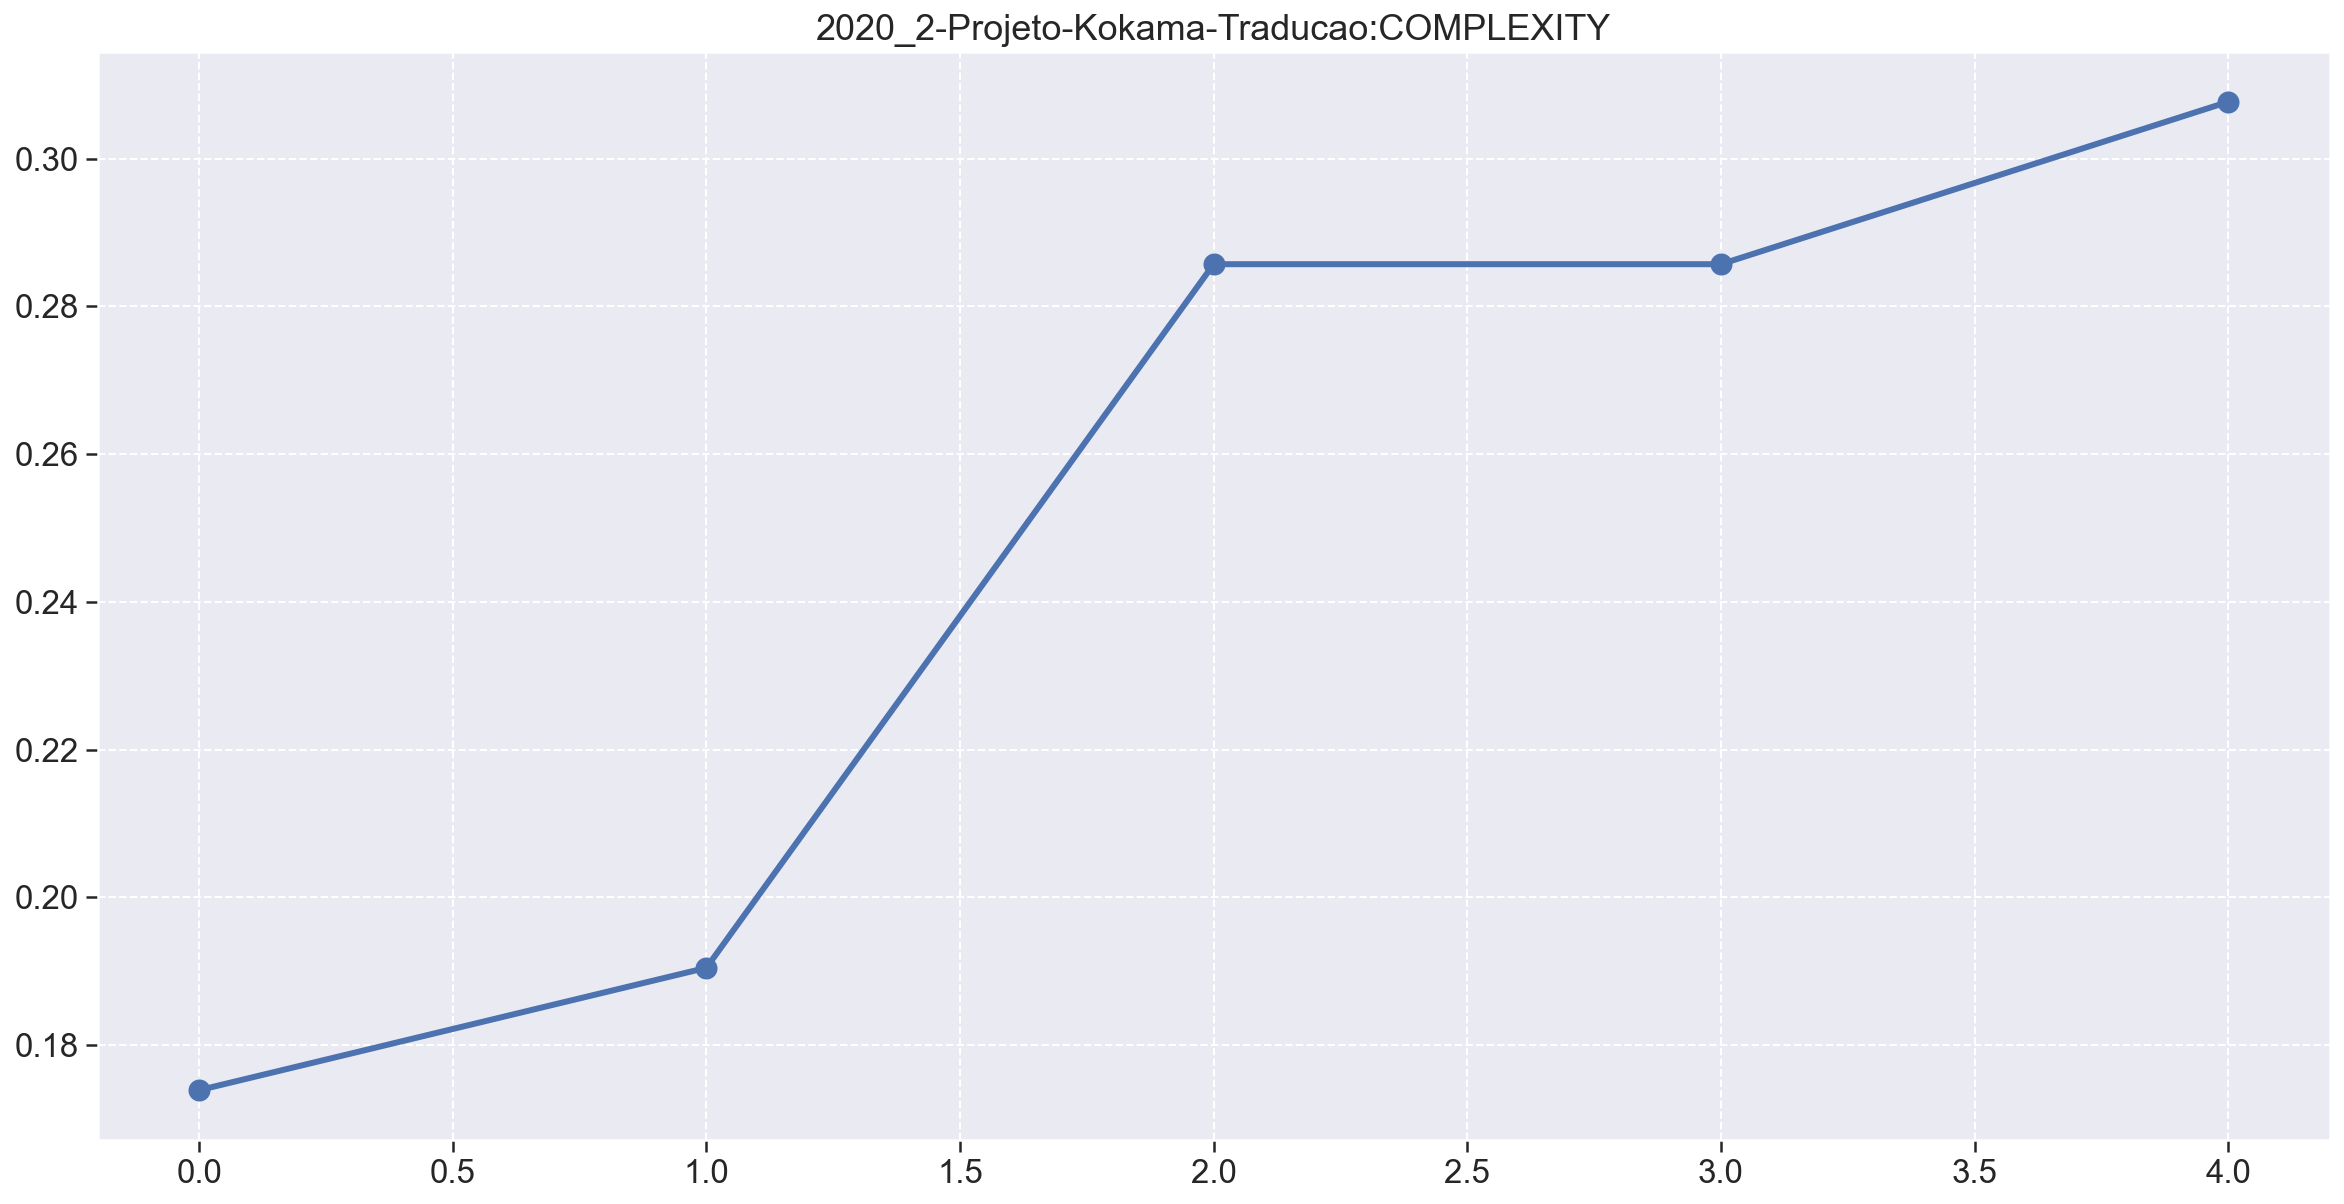

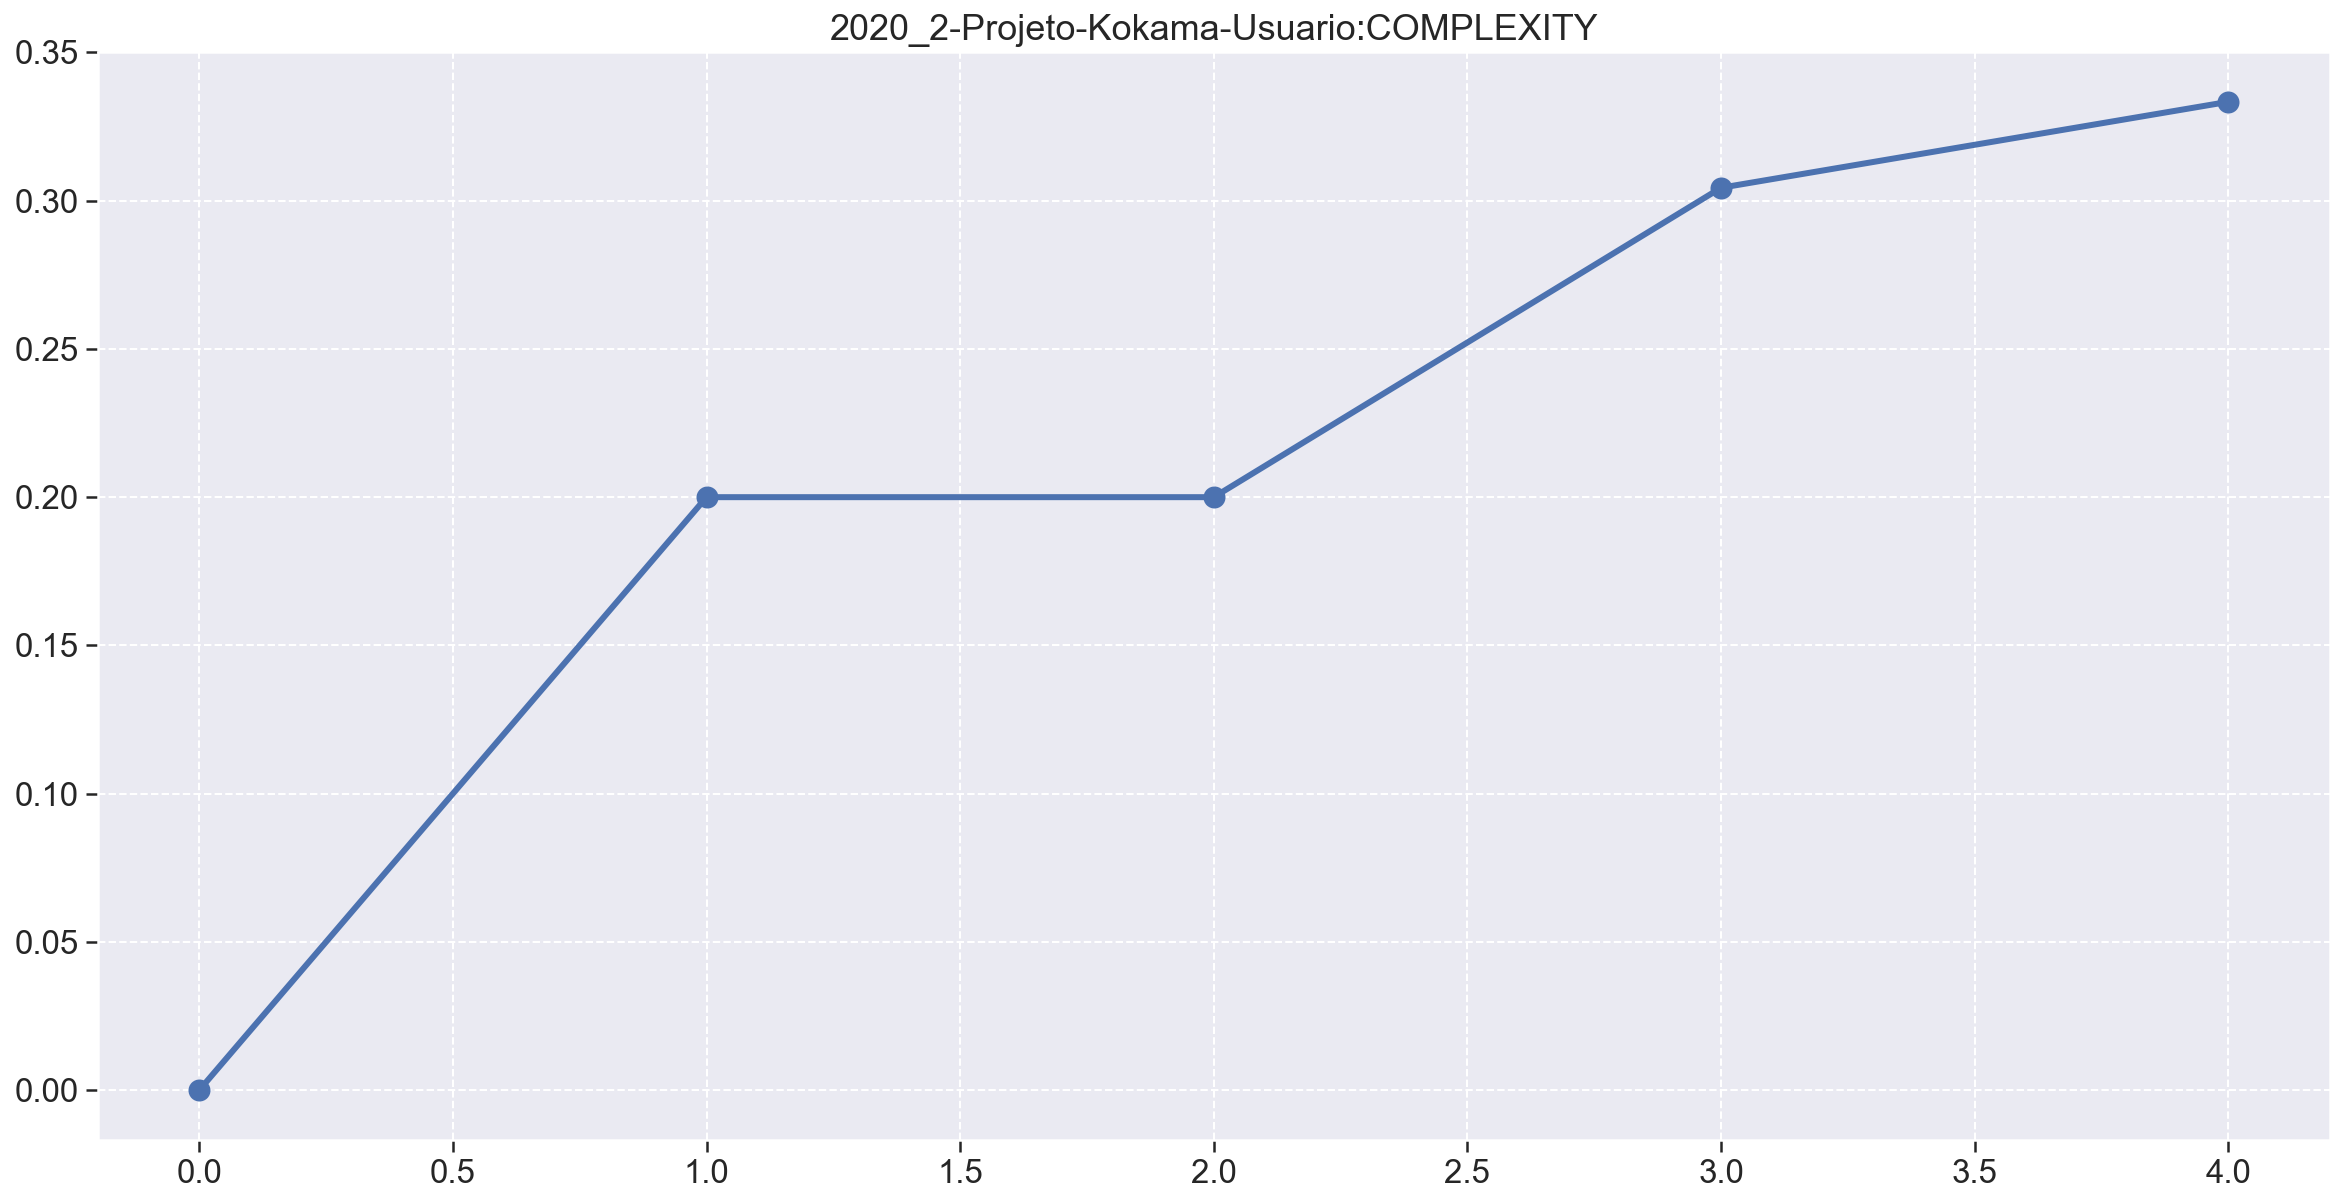

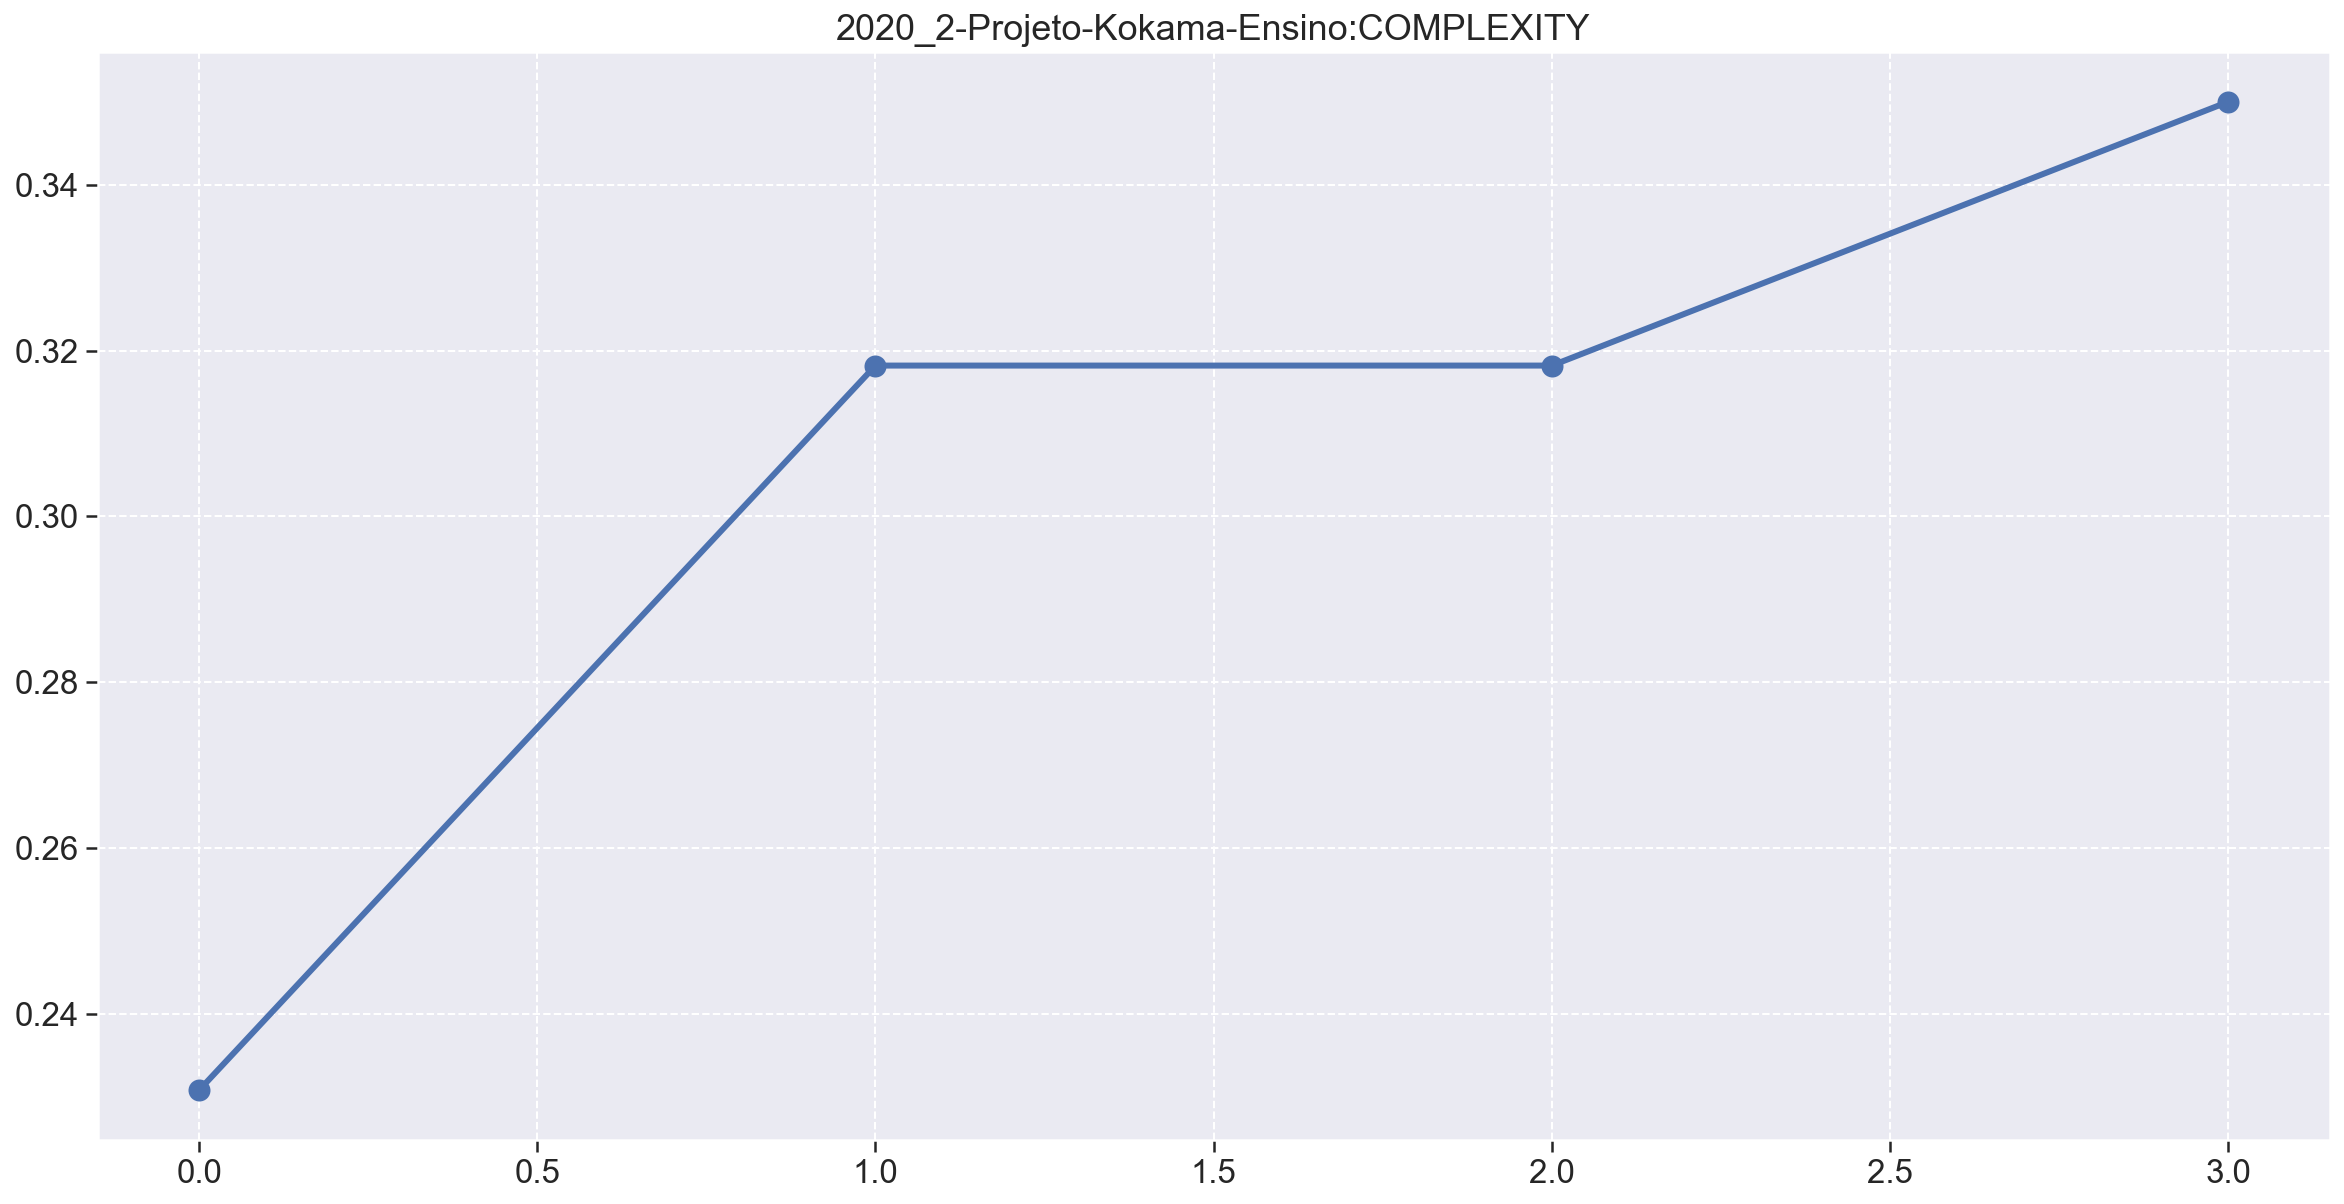

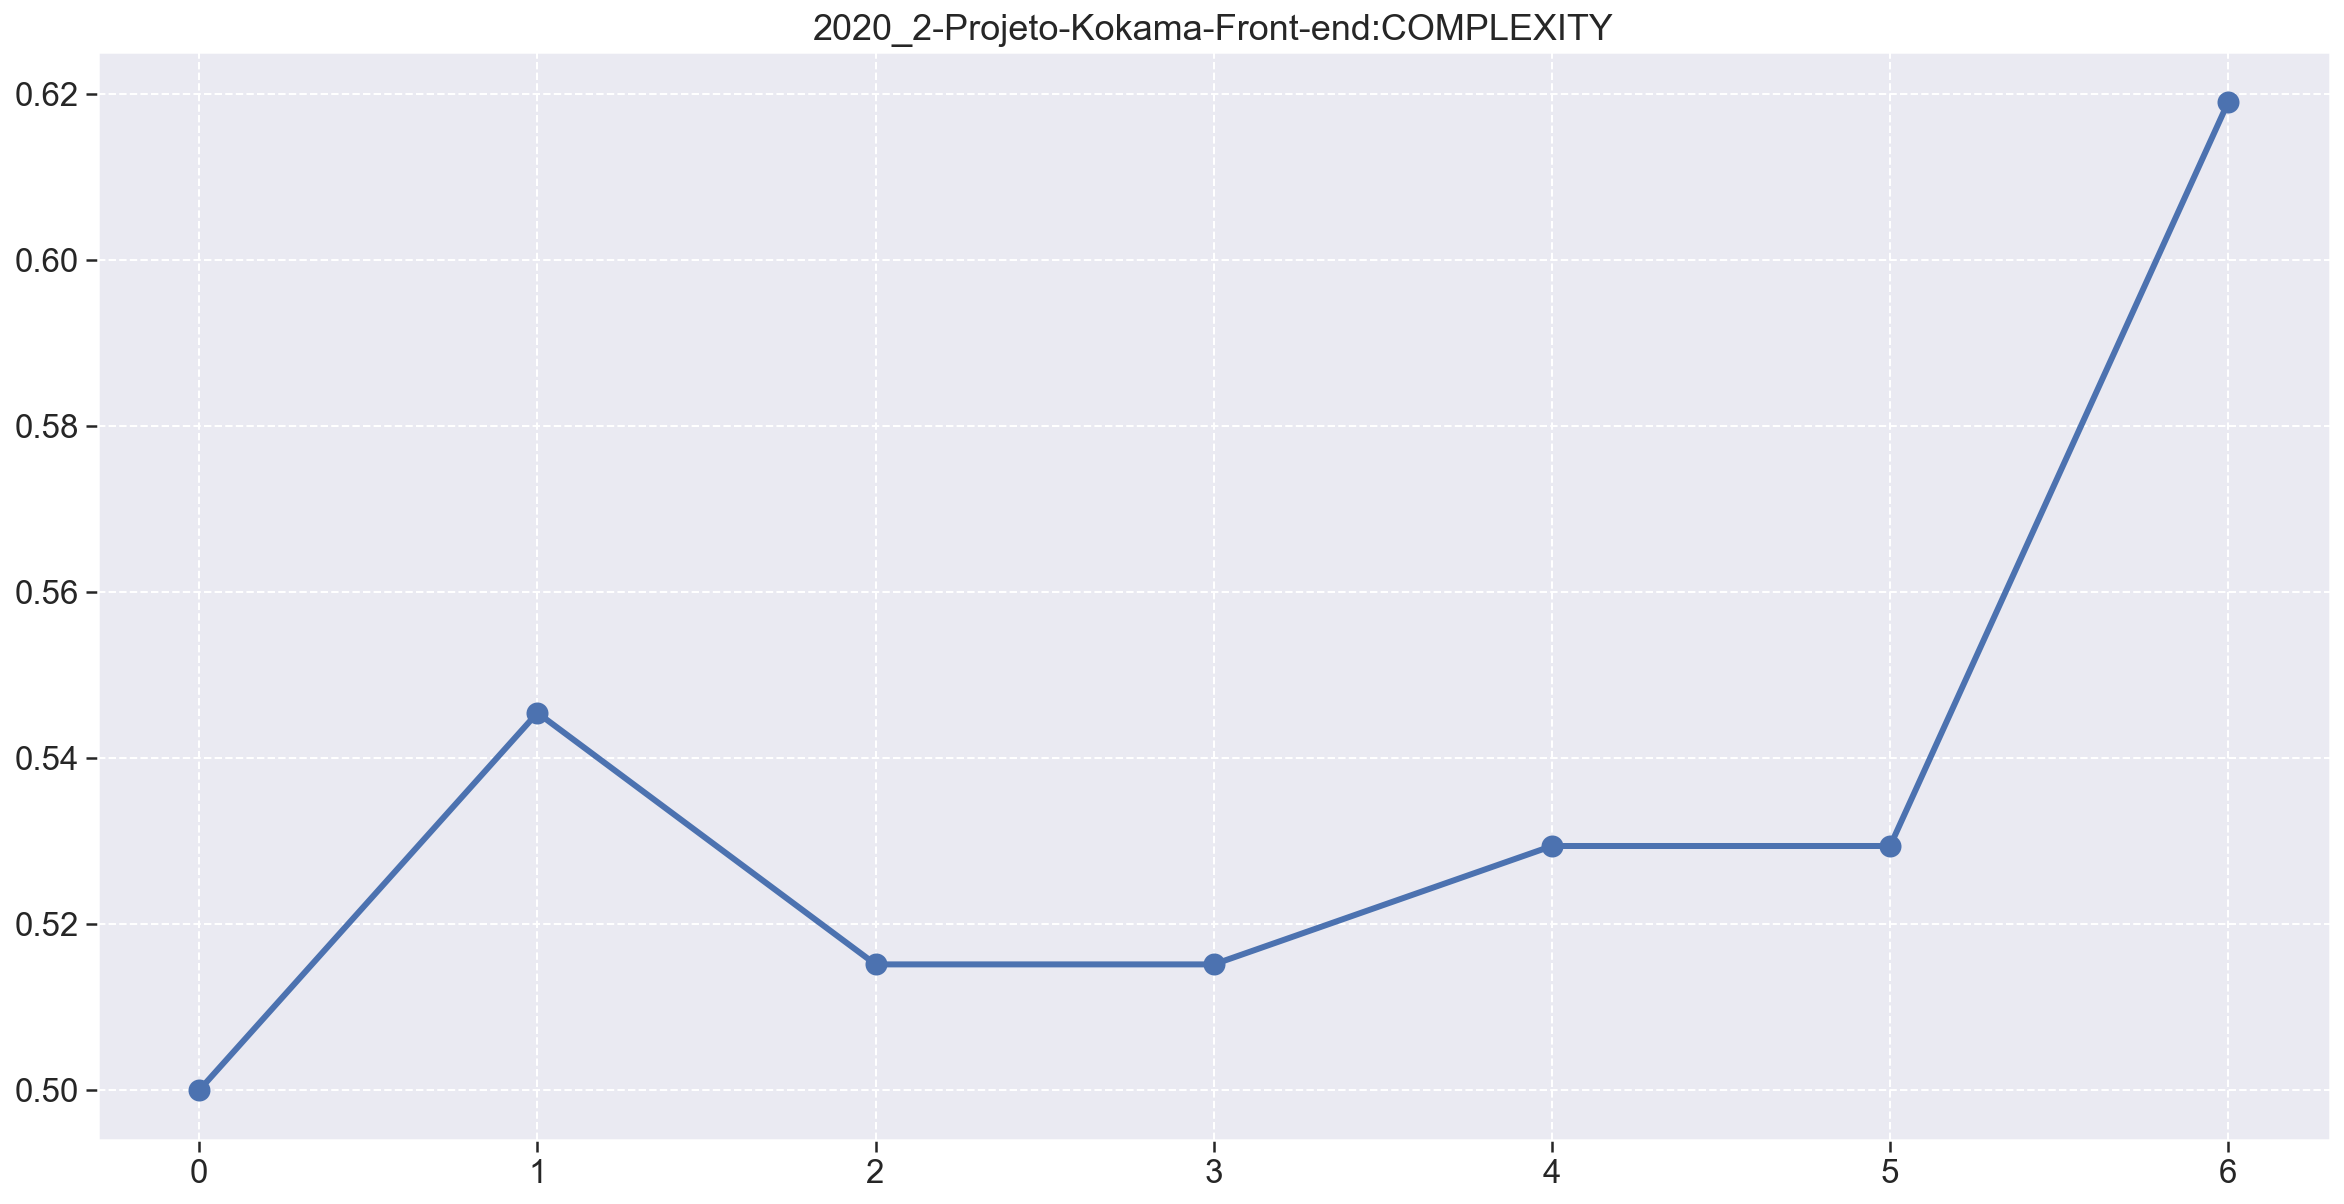

In [251]:
for repository, metrics_df in repository_metrics.items():
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.plot(metrics_df['m1'], linewidth=3, marker='o', markersize=10)

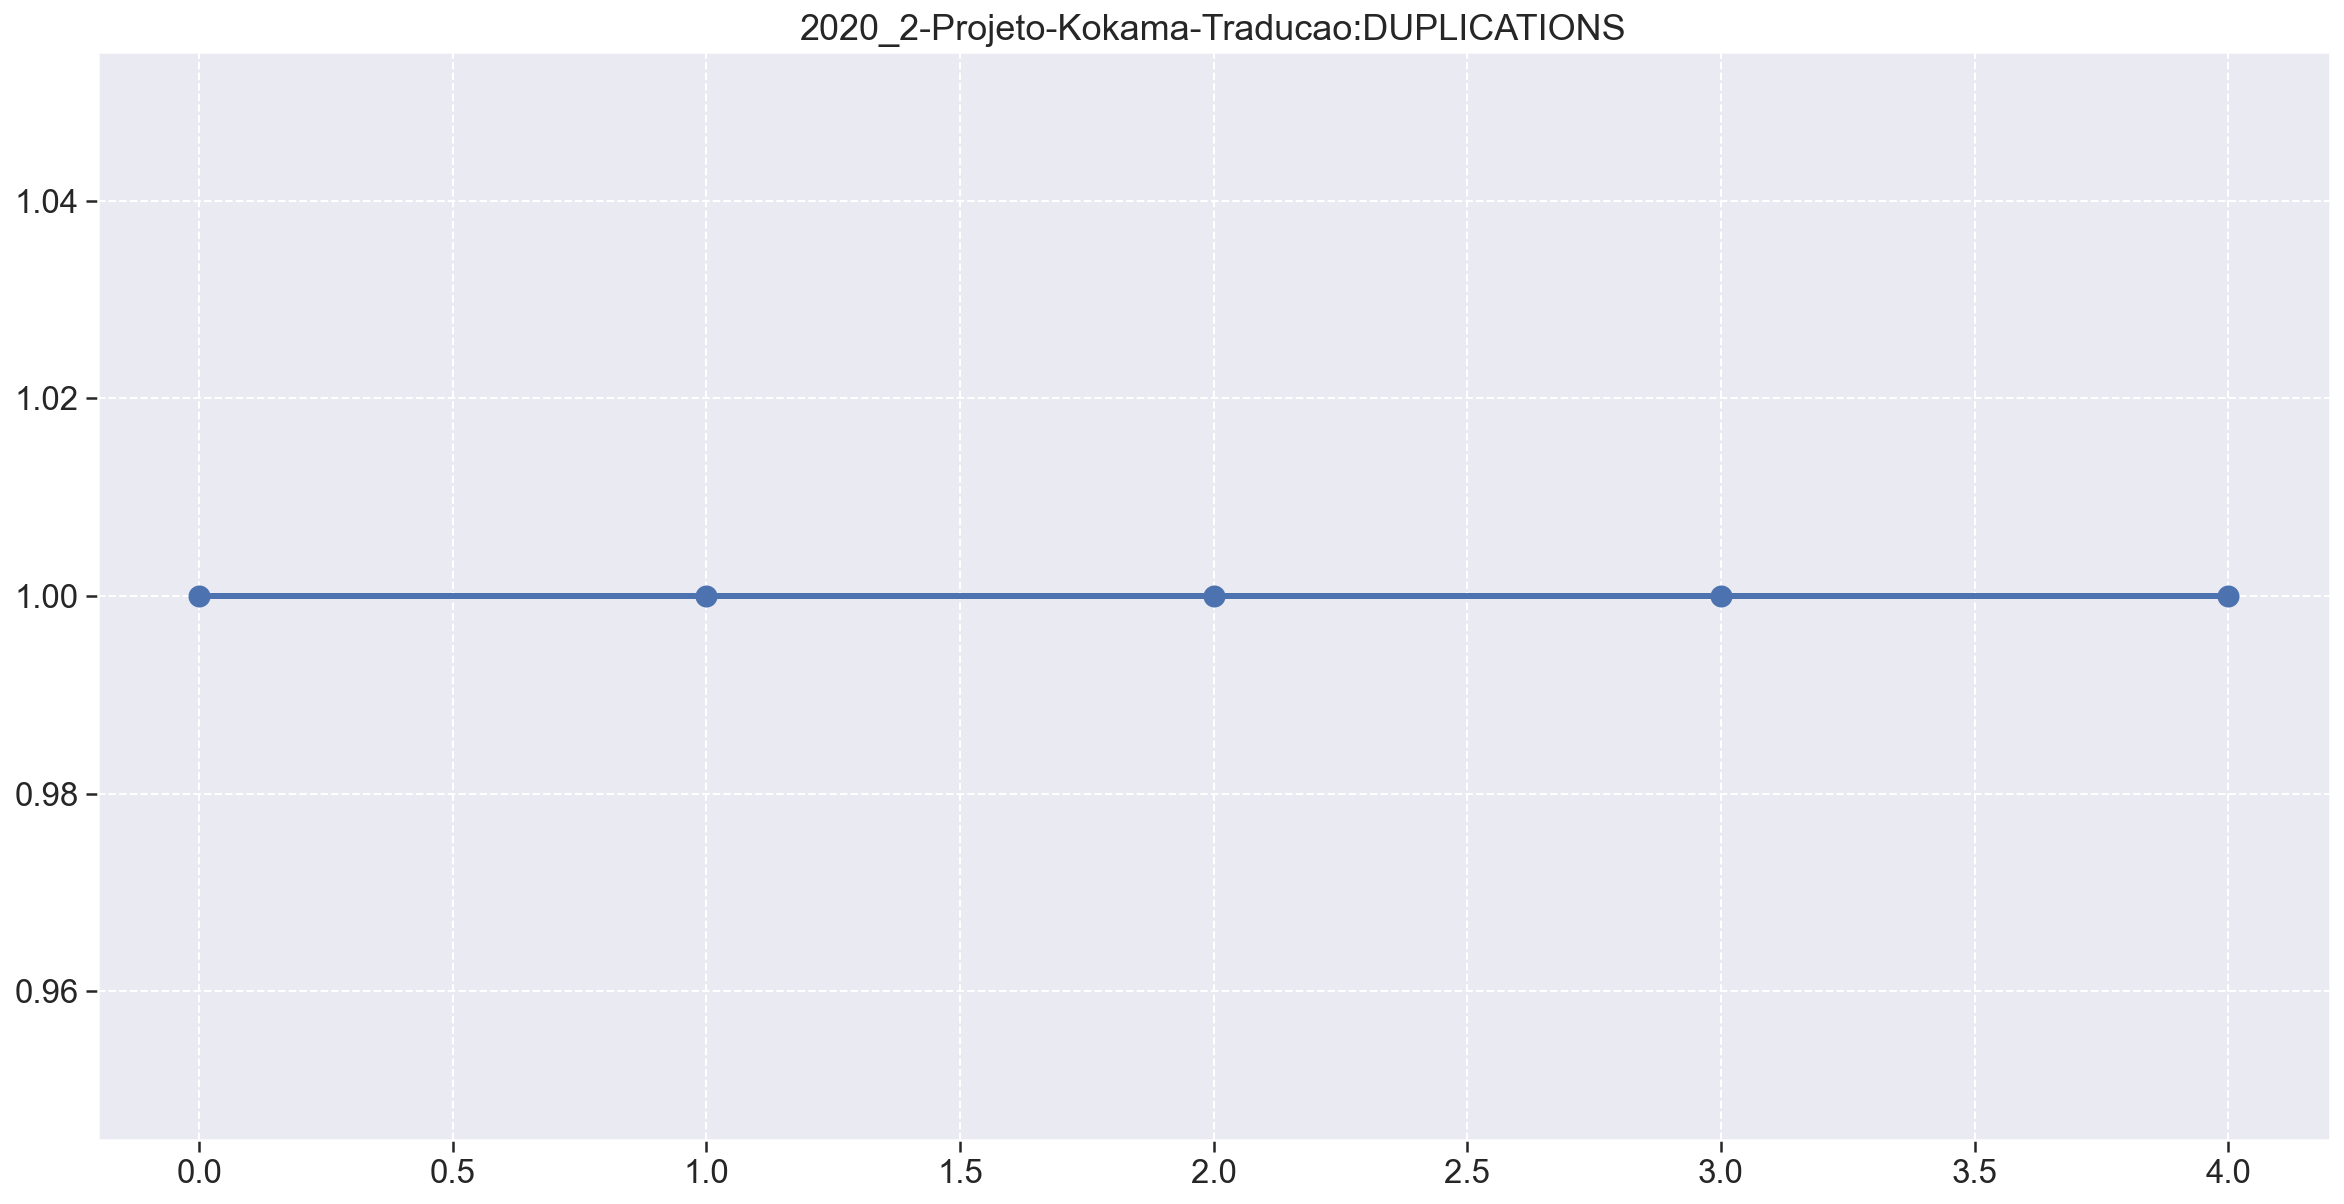

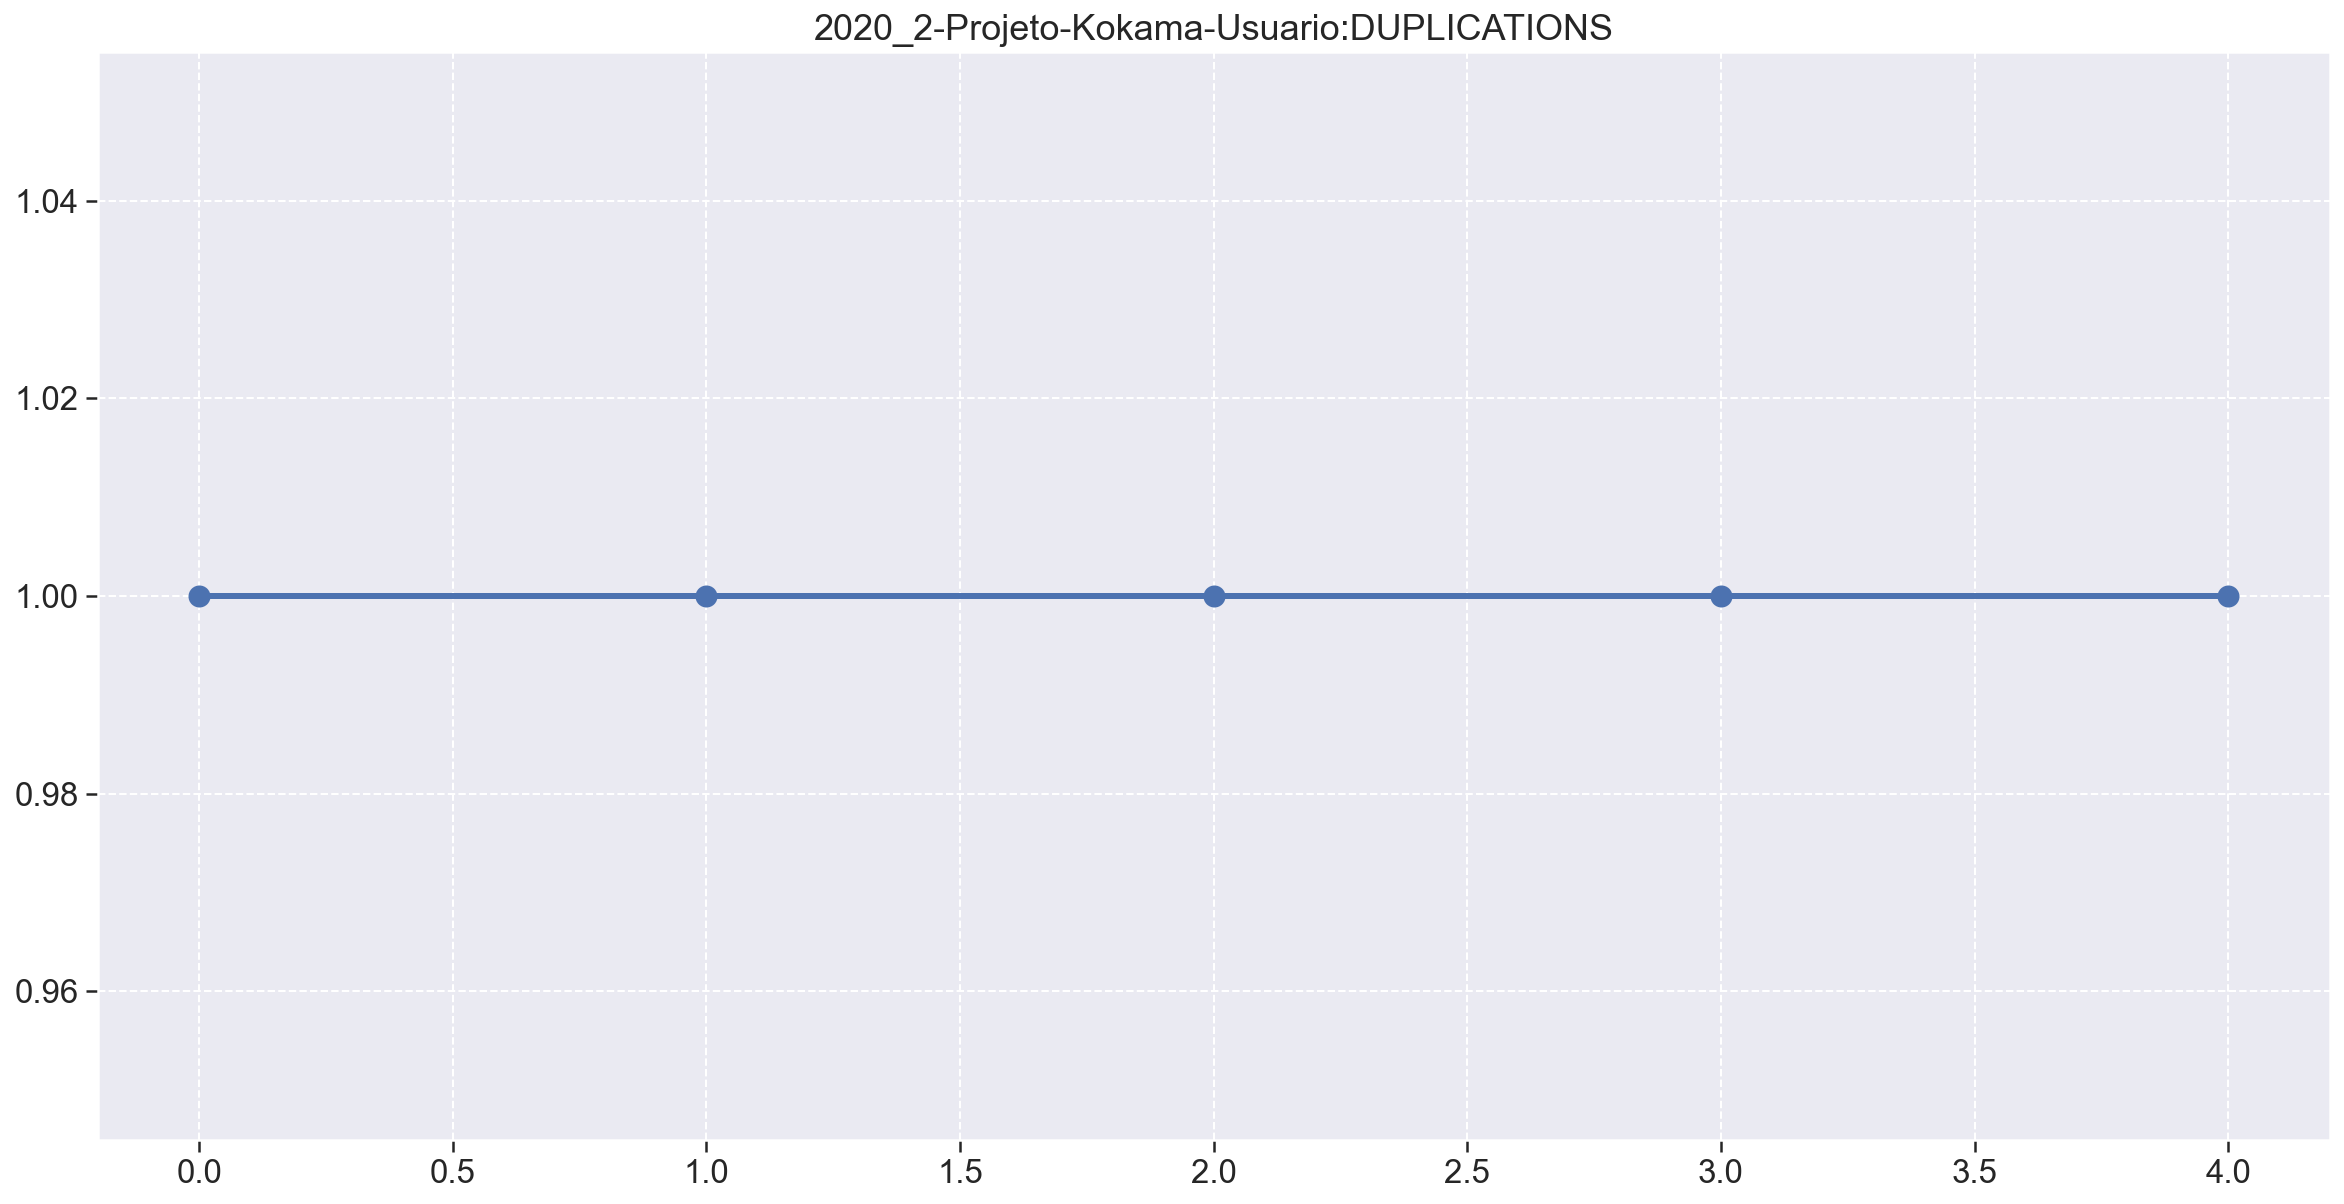

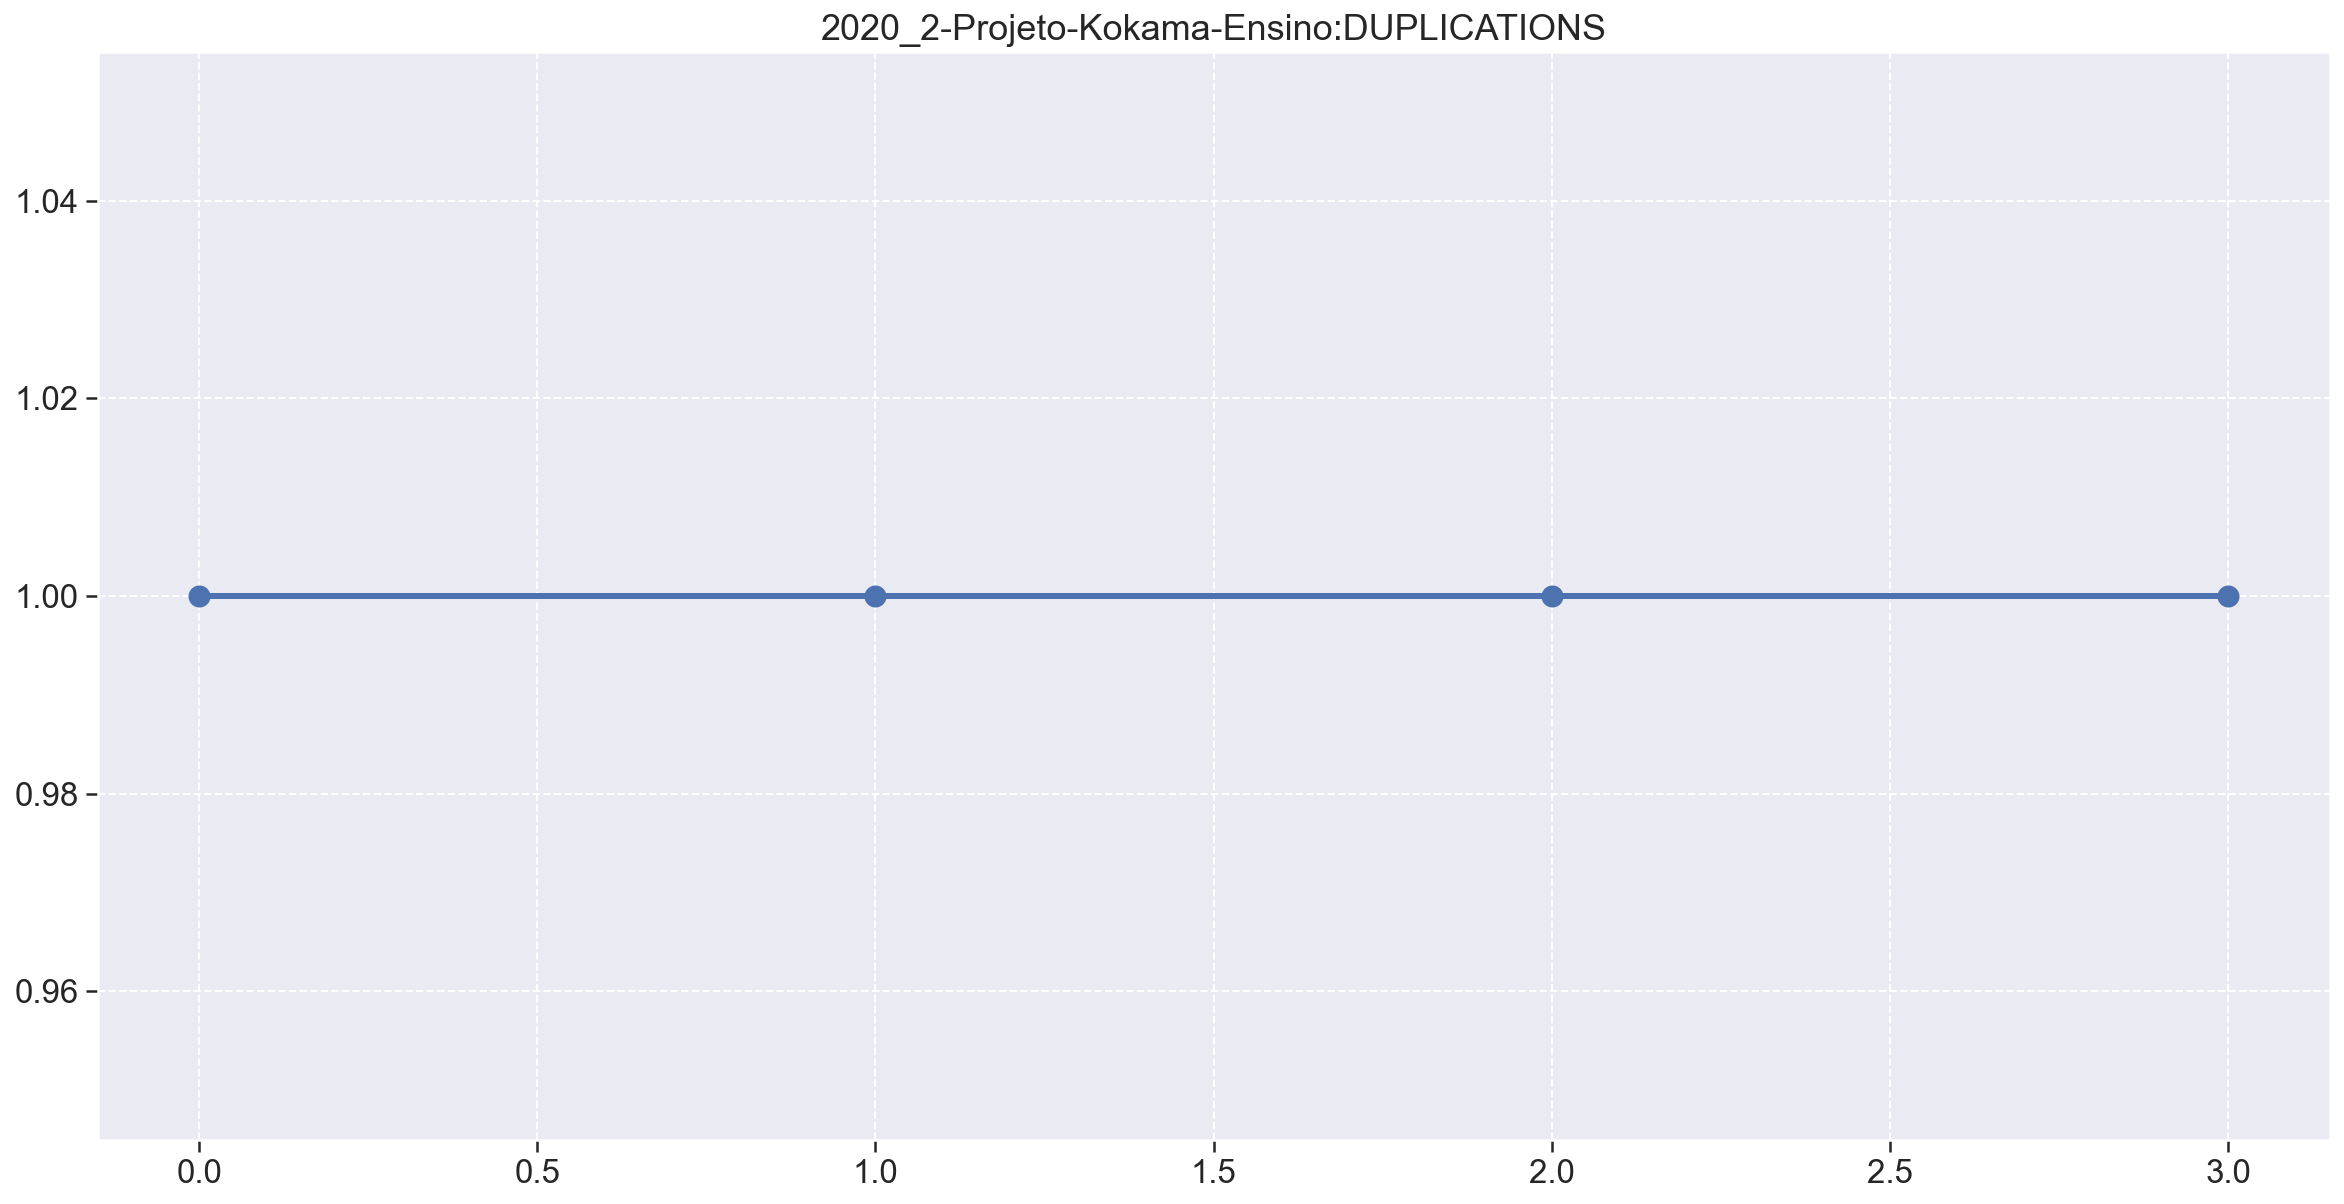

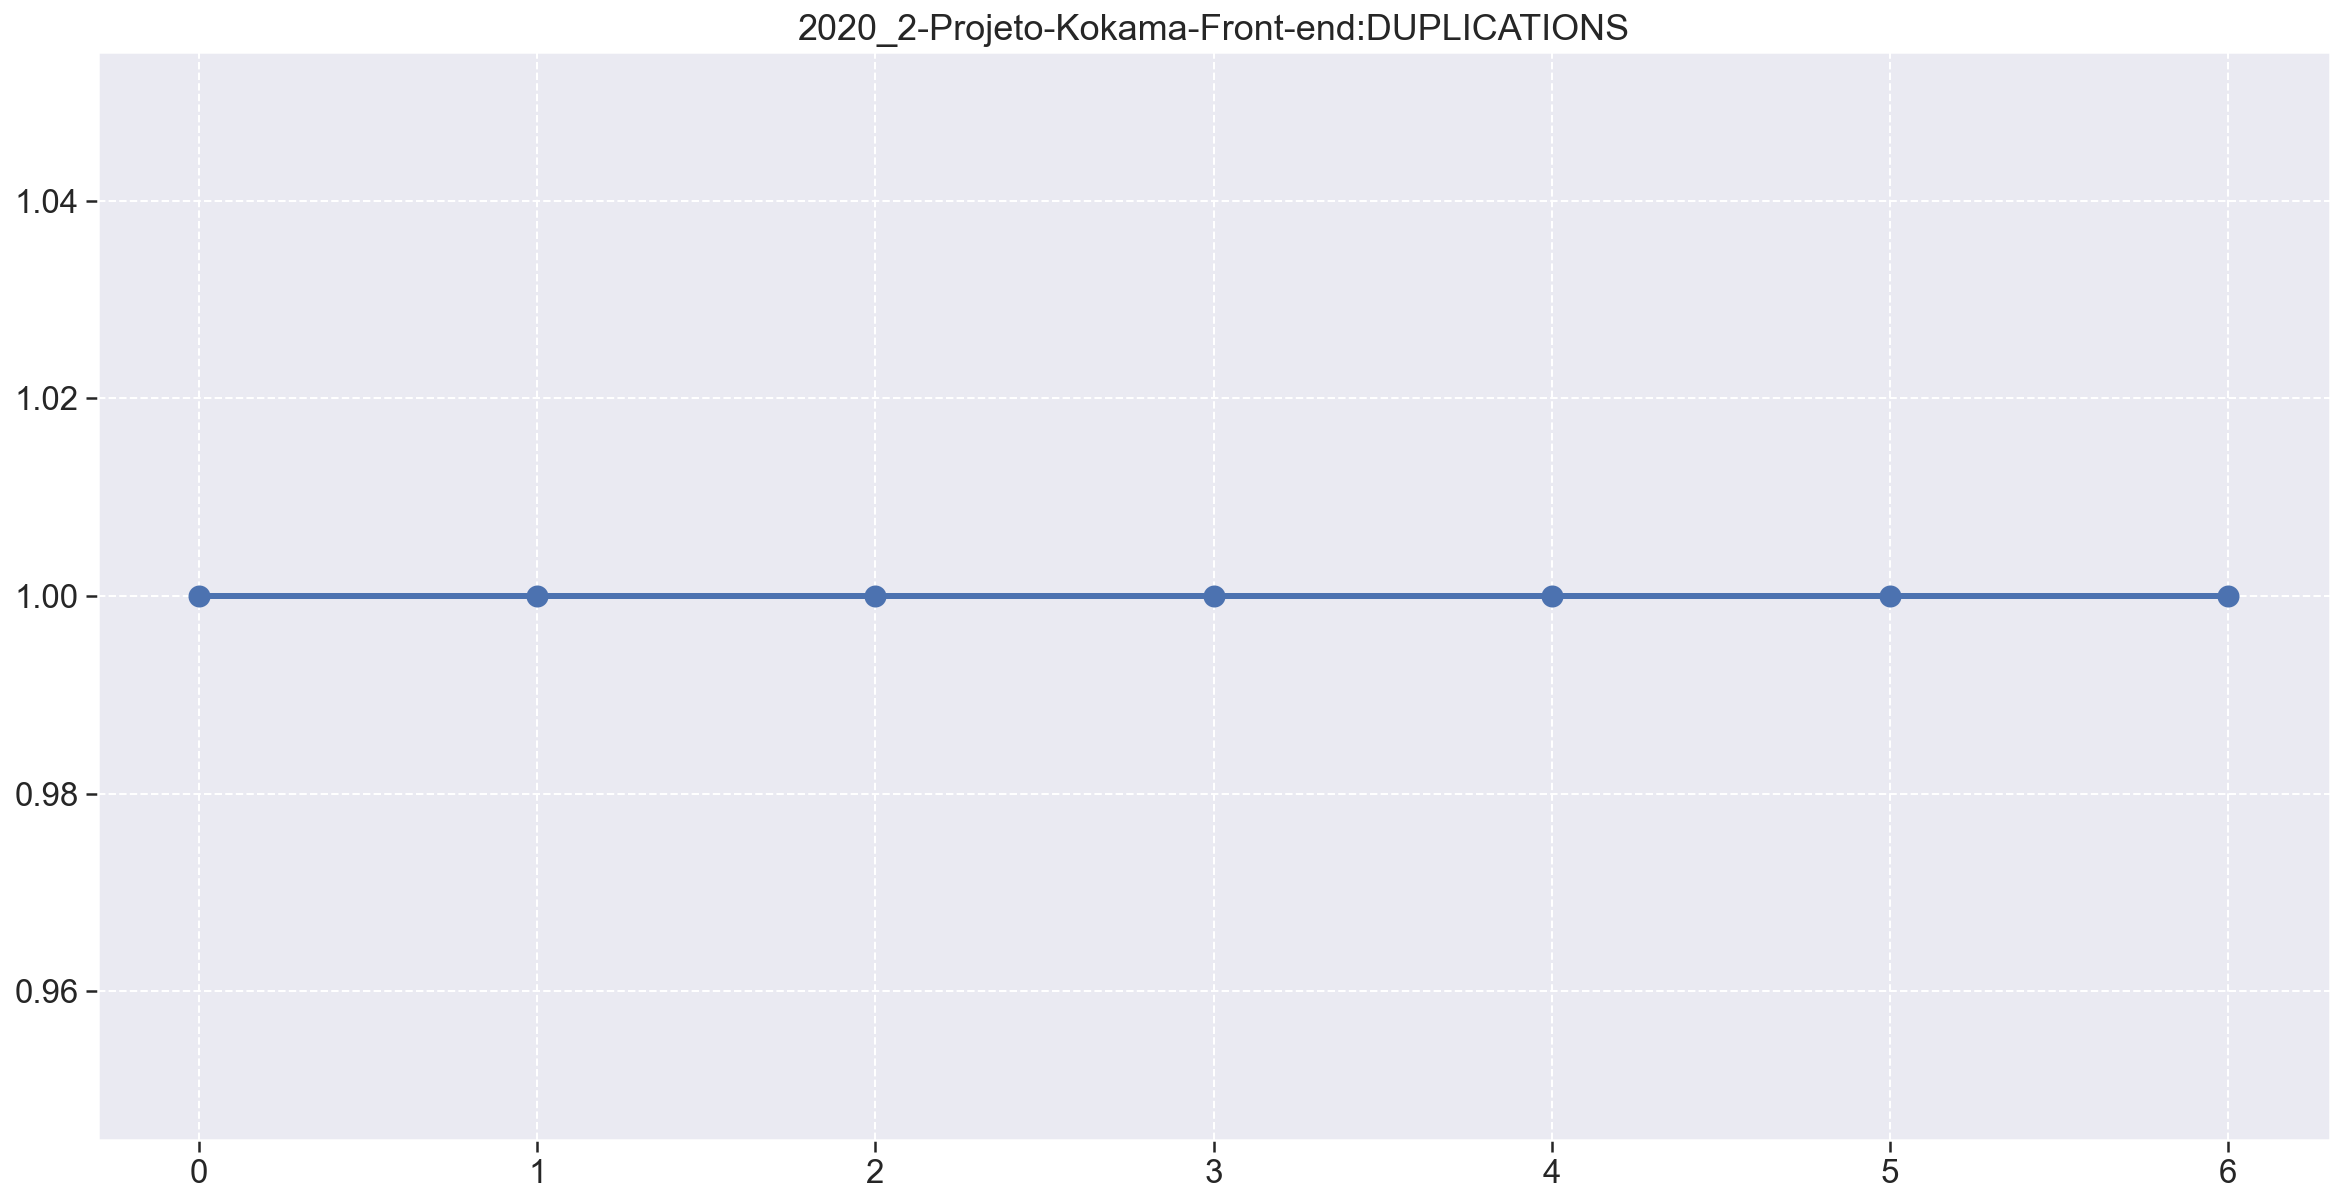

In [252]:
for repository, metrics_df in repository_metrics.items():
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:DUPLICATIONS")
    plt.plot(metrics_df['m3'], linewidth=3, marker='o', markersize=10)

## Repository: User

#### All metrics

(-0.02, 1.02)

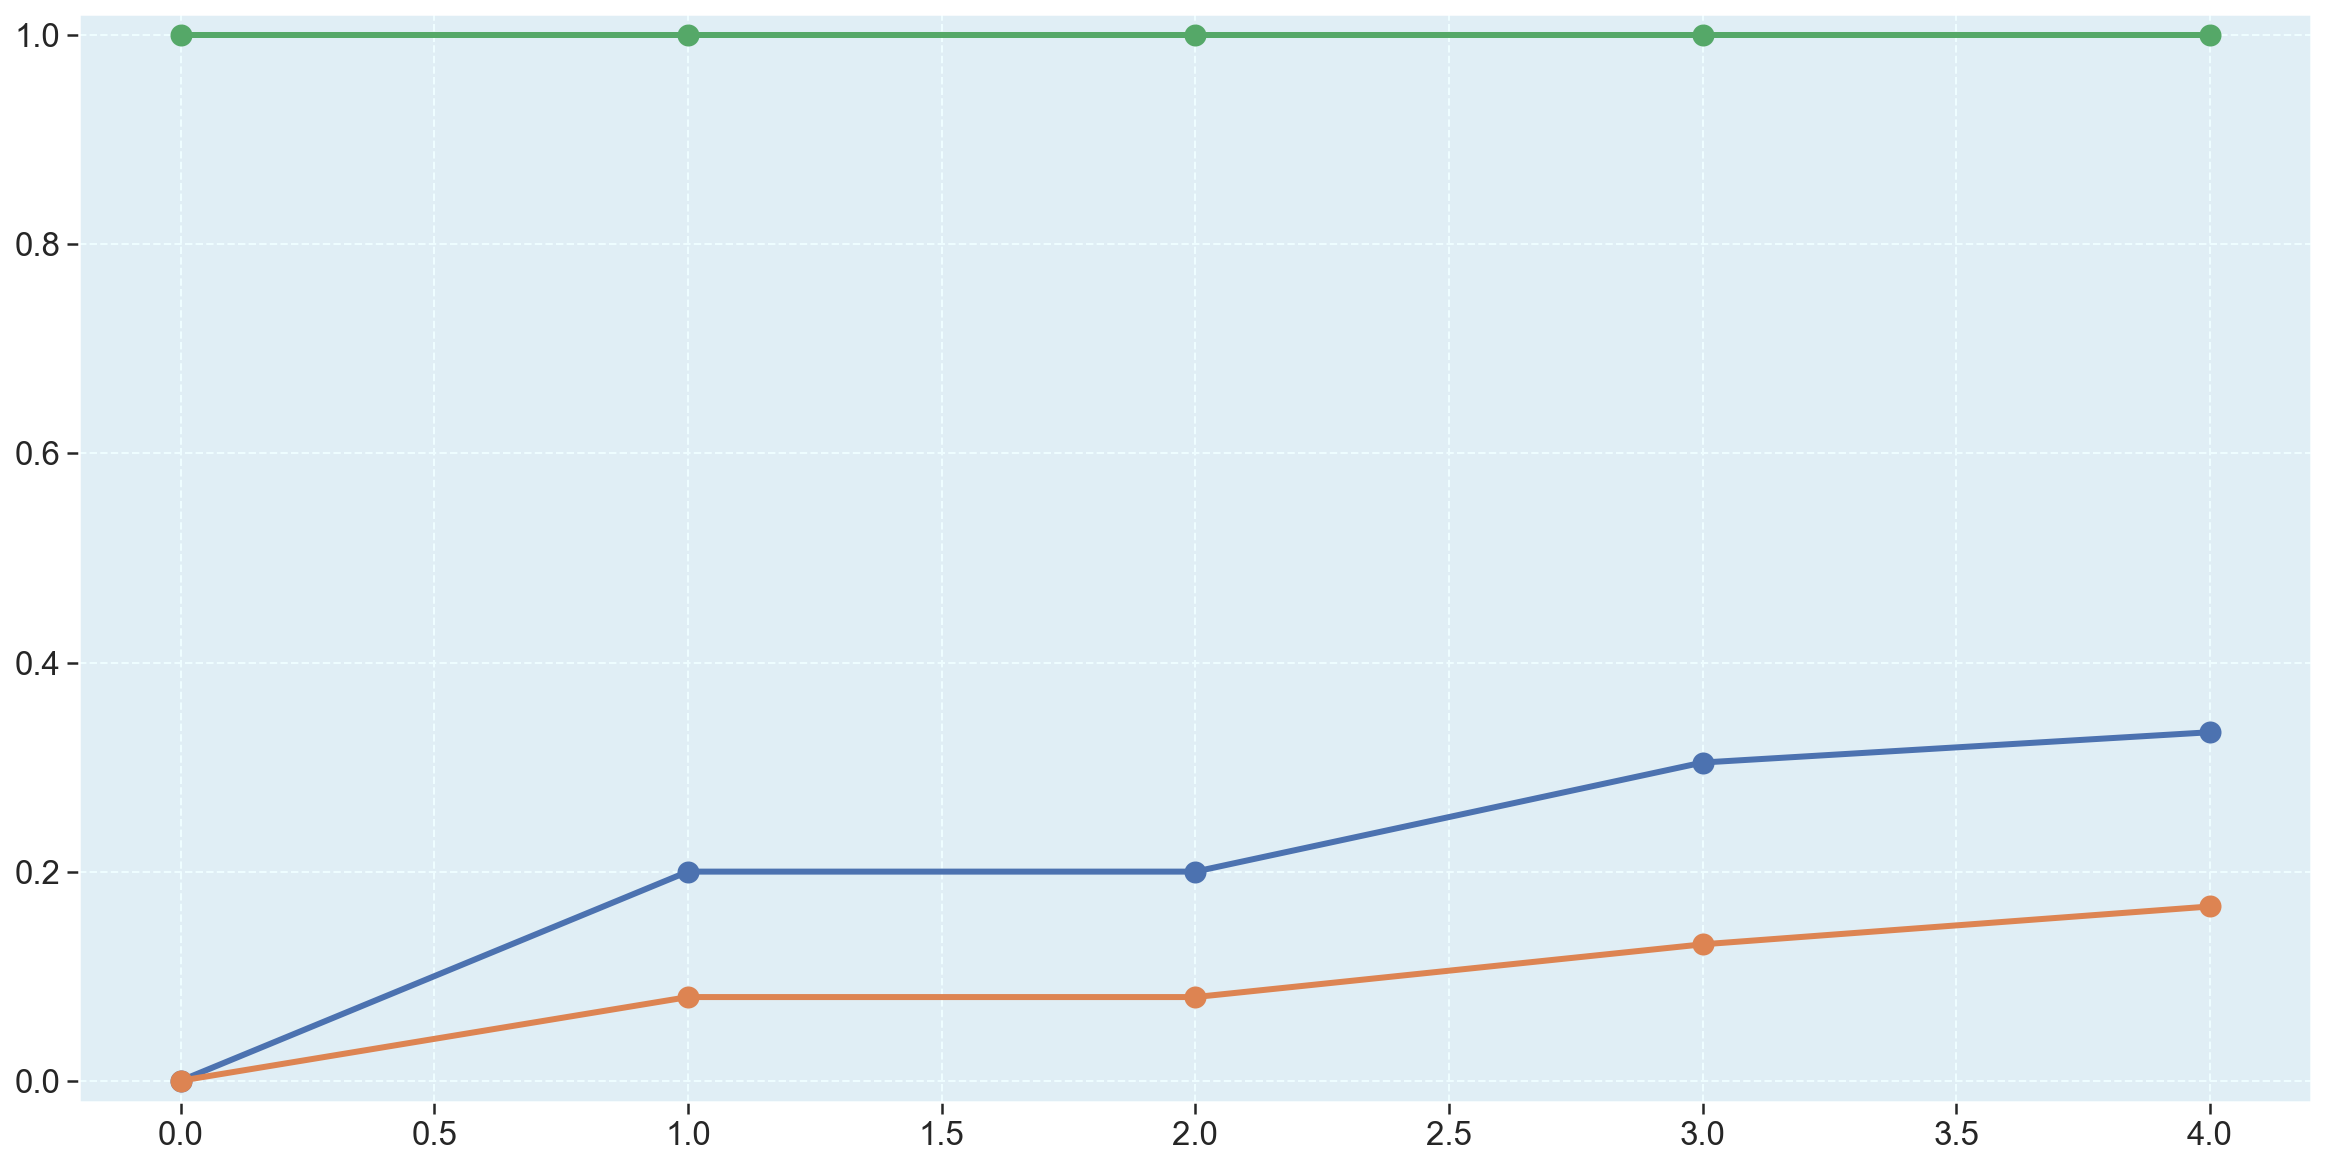

In [253]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["2020_2-Projeto-Kokama-Usuario"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Usuario"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Usuario"]['m3'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.ylim(-.02,1.02)

## Repository: Frontend

#### All metrics

(-0.02, 1.02)

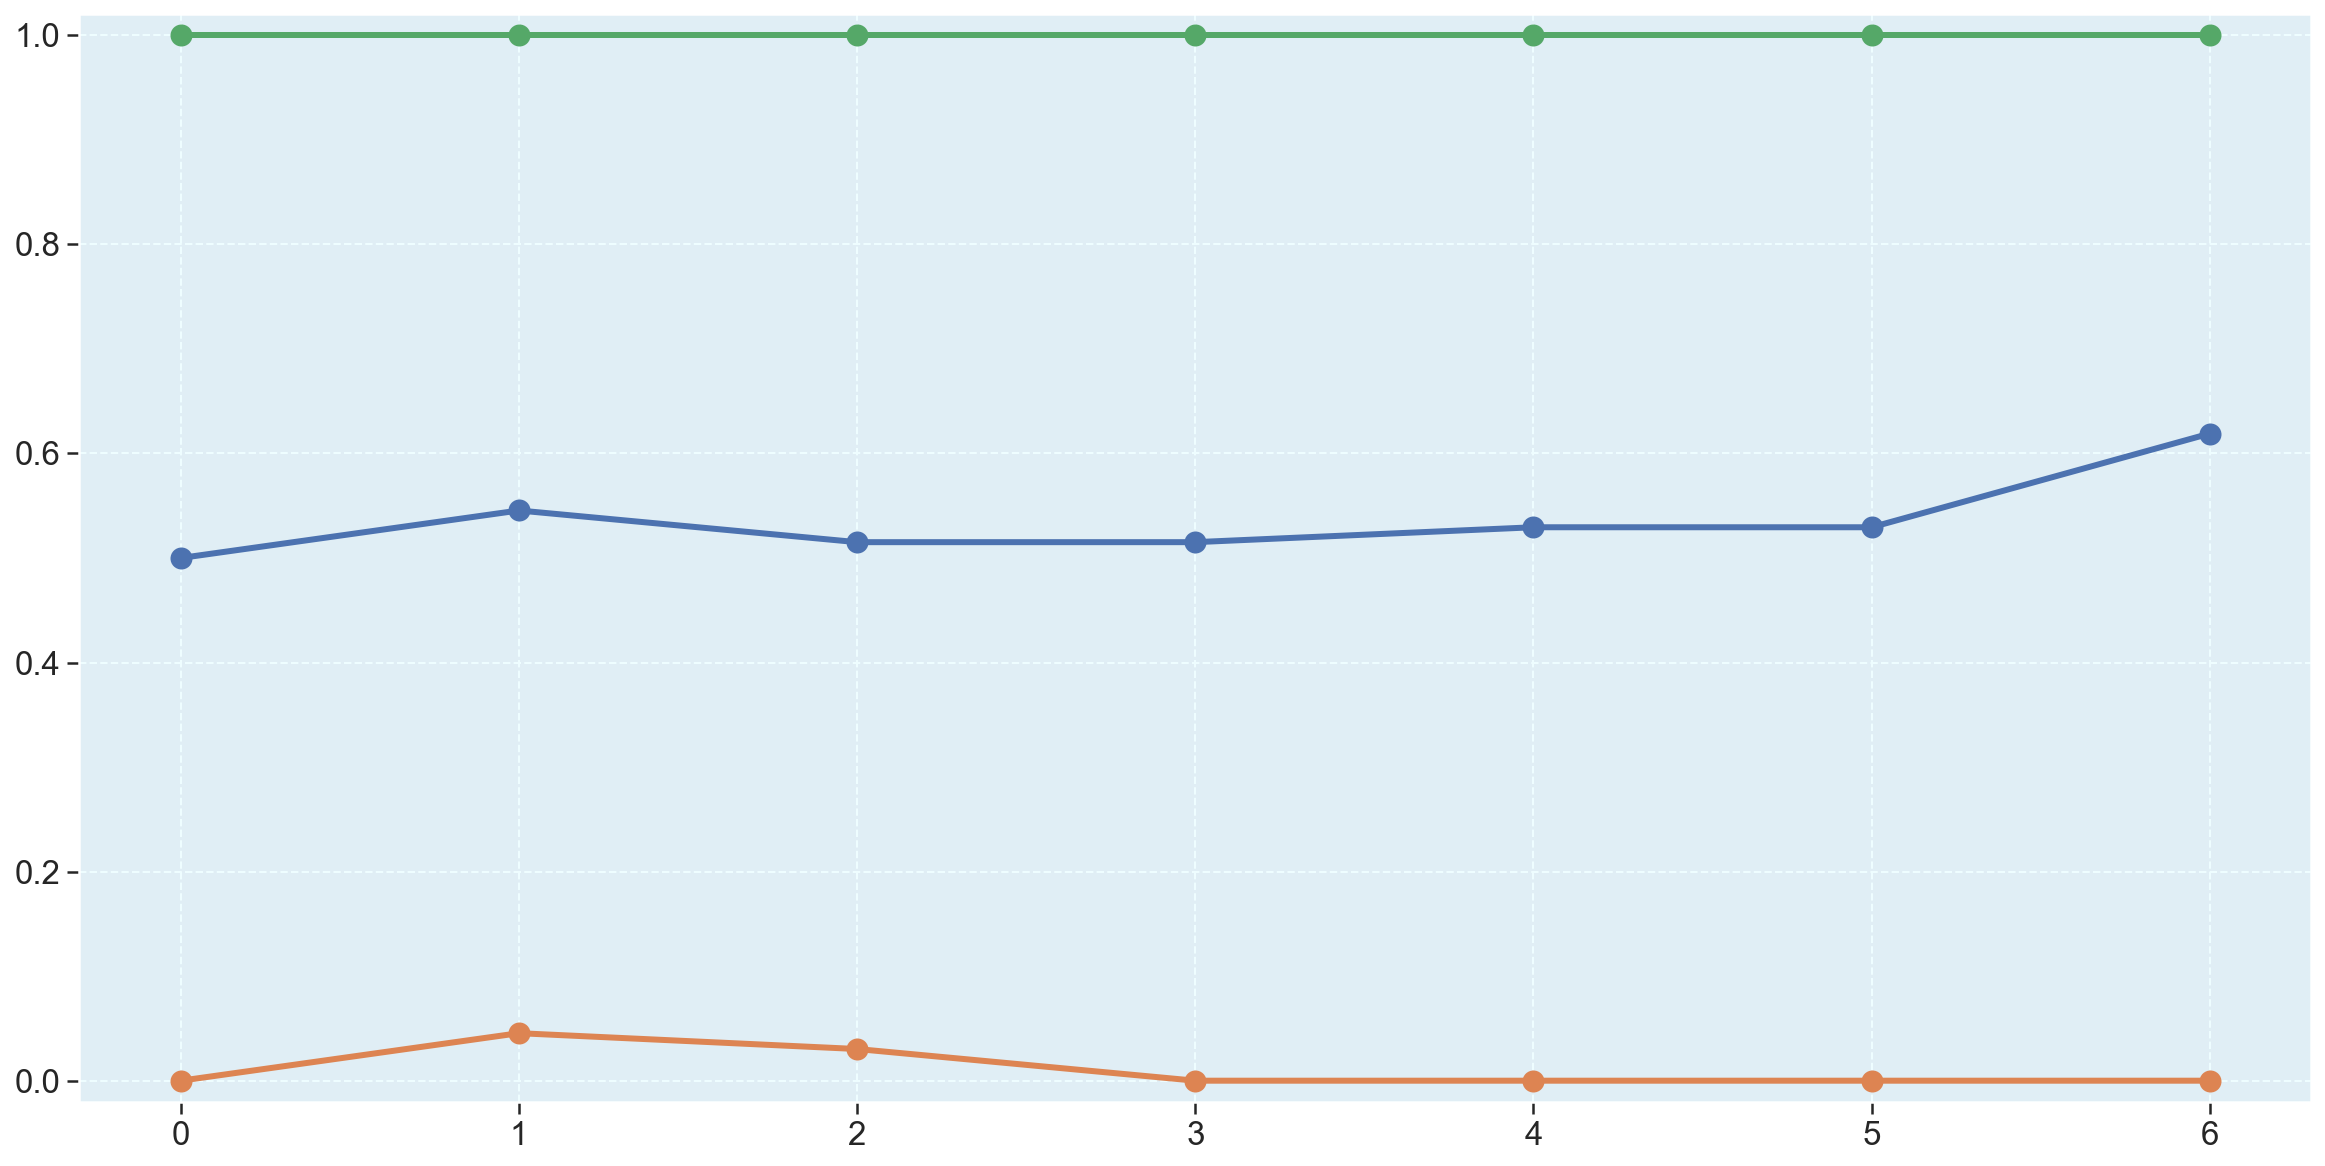

In [254]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["2020_2-Projeto-Kokama-Front-end"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Front-end"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Front-end"]['m3'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.ylim(-.02,1.02)

## Repository: Ensino

#### All metrics

(-0.02, 1.02)

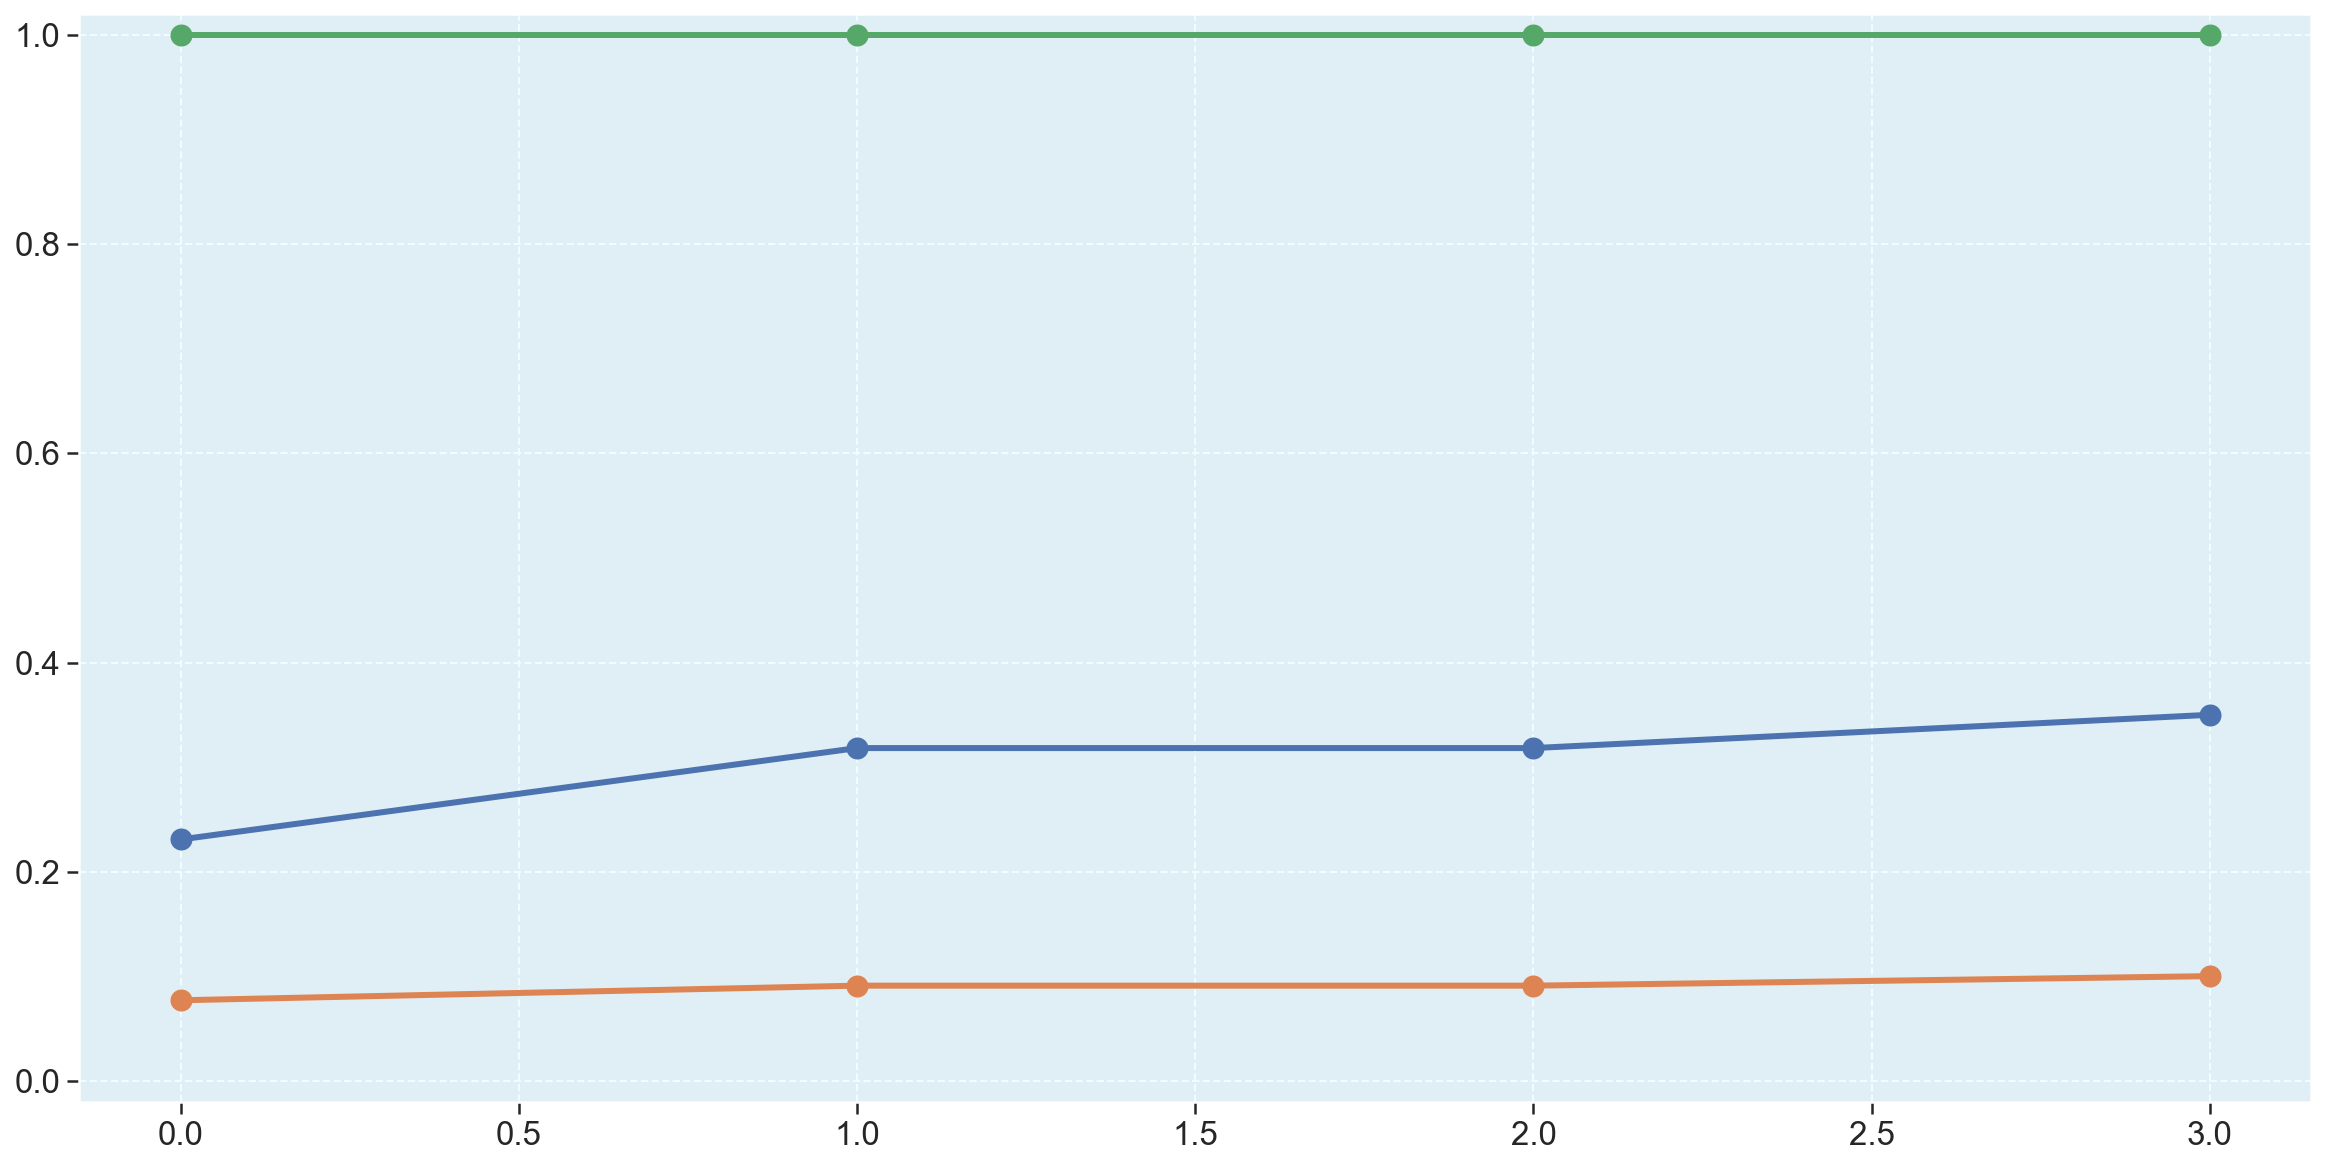

In [255]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["2020_2-Projeto-Kokama-Ensino"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Ensino"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Ensino"]['m3'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.ylim(-.02,1.02)

## Repository: Traducao

(-0.02, 1.02)

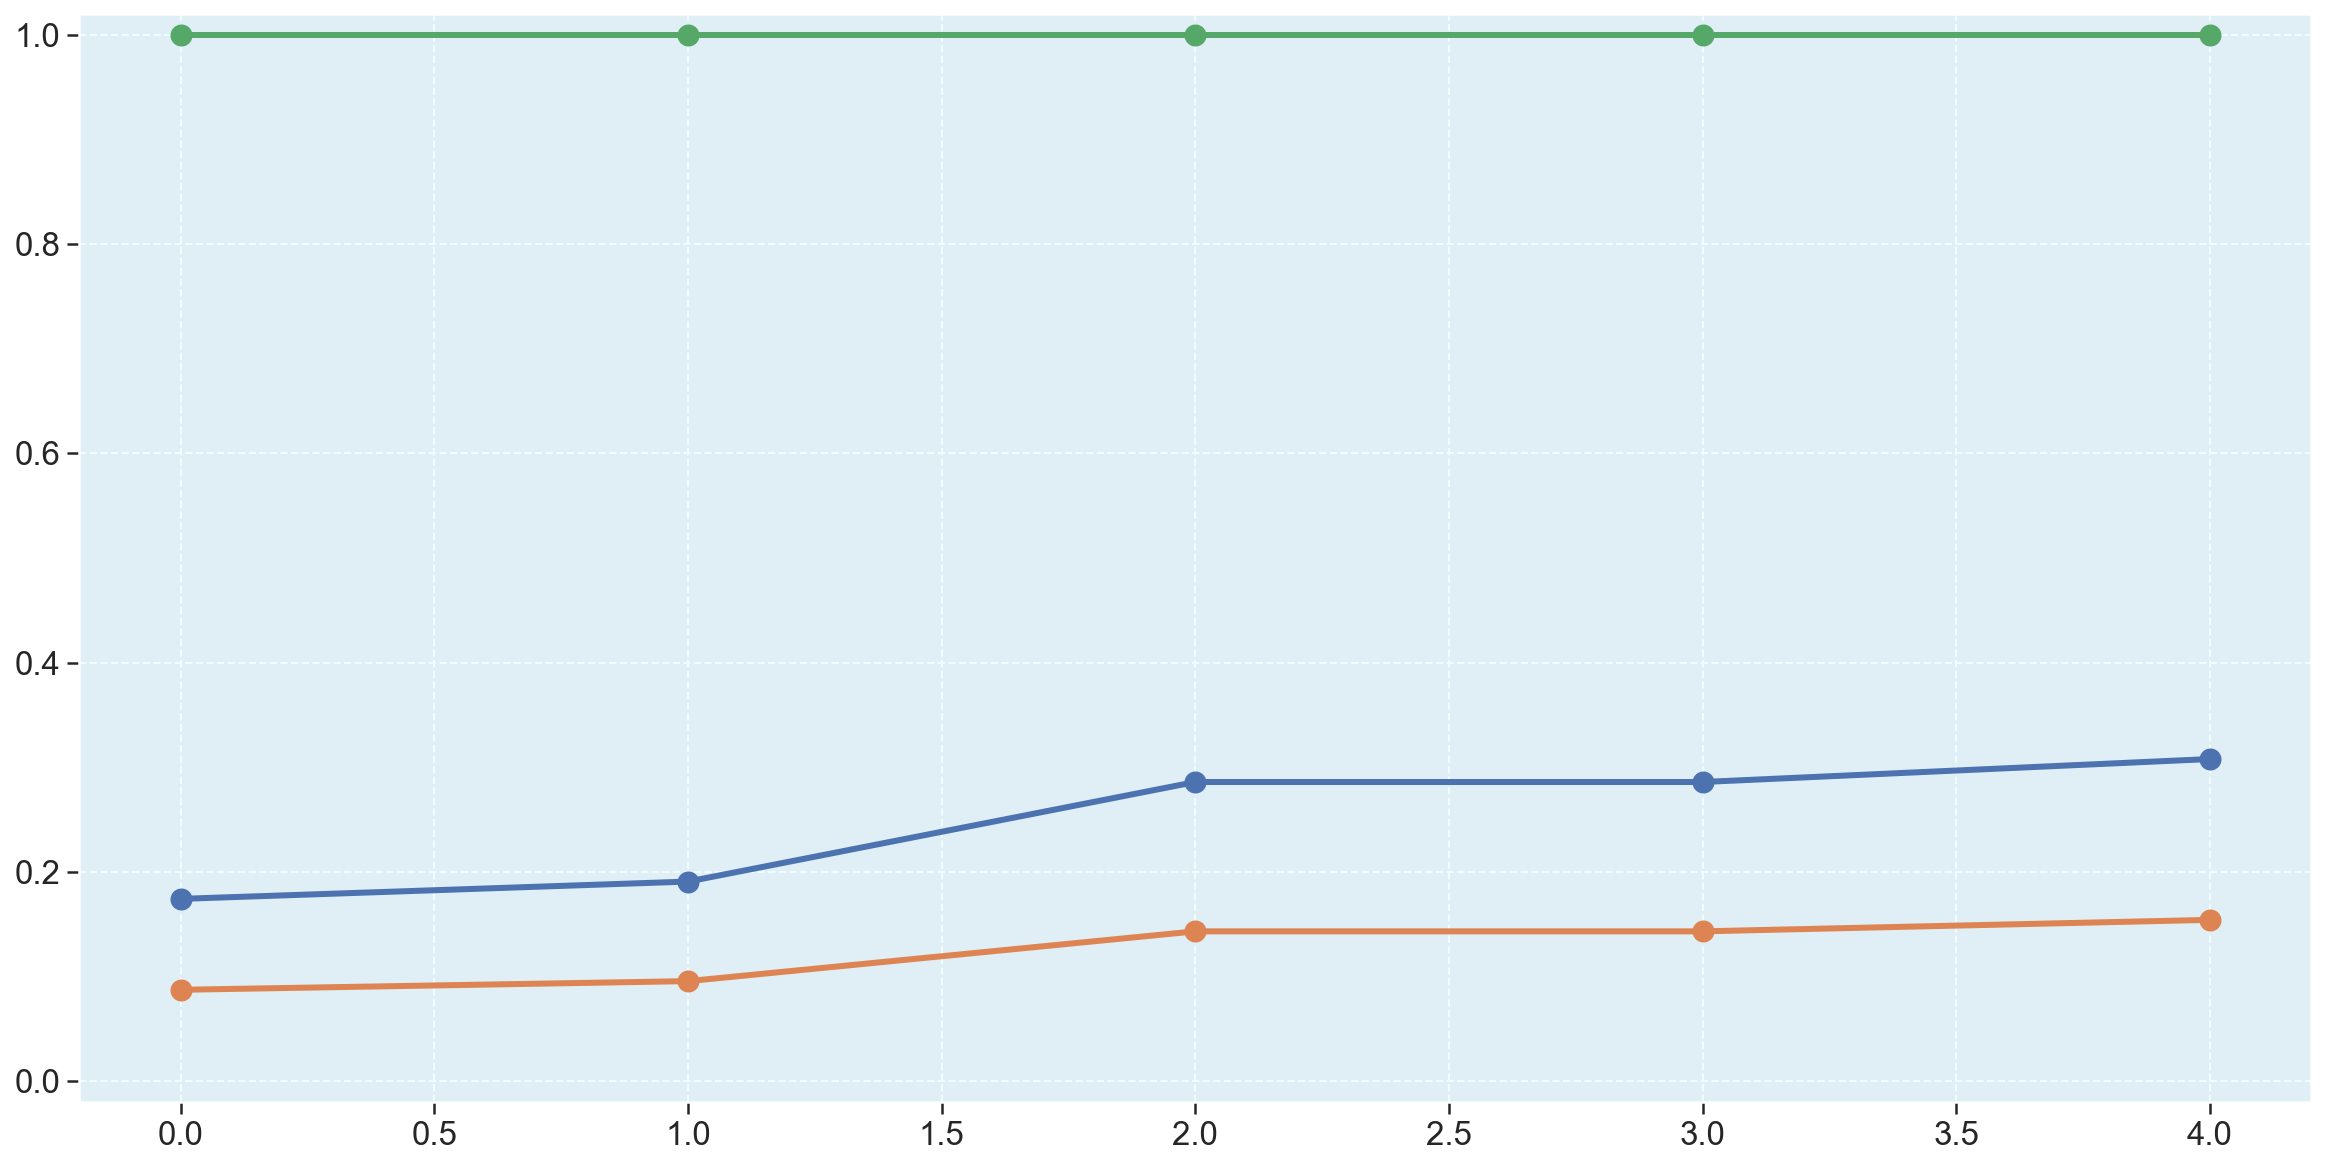

In [256]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["2020_2-Projeto-Kokama-Traducao"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Traducao"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Traducao"]['m3'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.ylim(-.02,1.02)

### Ponderação e Agregação na SubCaracterística

In [257]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

repository_metrics["2020_2-Projeto-Kokama-Usuario"]['asc1'] = ((repository_metrics["2020_2-Projeto-Kokama-Usuario"]['m1']*pm1)+
                                                                   (repository_metrics["2020_2-Projeto-Kokama-Usuario"]['m2']*pm2)+
                                                                   (repository_metrics["2020_2-Projeto-Kokama-Usuario"]['m3']*pm3)) * psc1

repository_metrics["2020_2-Projeto-Kokama-Front-end"]['asc1'] = ((repository_metrics["2020_2-Projeto-Kokama-Front-end"]['m1']*pm1)+
                                                                   (repository_metrics["2020_2-Projeto-Kokama-Front-end"]['m2']*pm2)+
                                                                   (repository_metrics["2020_2-Projeto-Kokama-Front-end"]['m3']*pm3)) * psc1

repository_metrics["2020_2-Projeto-Kokama-Ensino"]['asc1'] = ((repository_metrics["2020_2-Projeto-Kokama-Ensino"]['m1']*pm1)+
                                                                   (repository_metrics["2020_2-Projeto-Kokama-Ensino"]['m2']*pm2)+
                                                                   (repository_metrics["2020_2-Projeto-Kokama-Ensino"]['m3']*pm3)) * psc1

repository_metrics["2020_2-Projeto-Kokama-Traducao"]['asc1'] = ((repository_metrics["2020_2-Projeto-Kokama-Traducao"]['m1']*pm1)+
                                                                   (repository_metrics["2020_2-Projeto-Kokama-Traducao"]['m2']*pm2)+
                                                                   (repository_metrics["2020_2-Projeto-Kokama-Traducao"]['m3']*pm3)) * psc1

(0.3, 0.6)

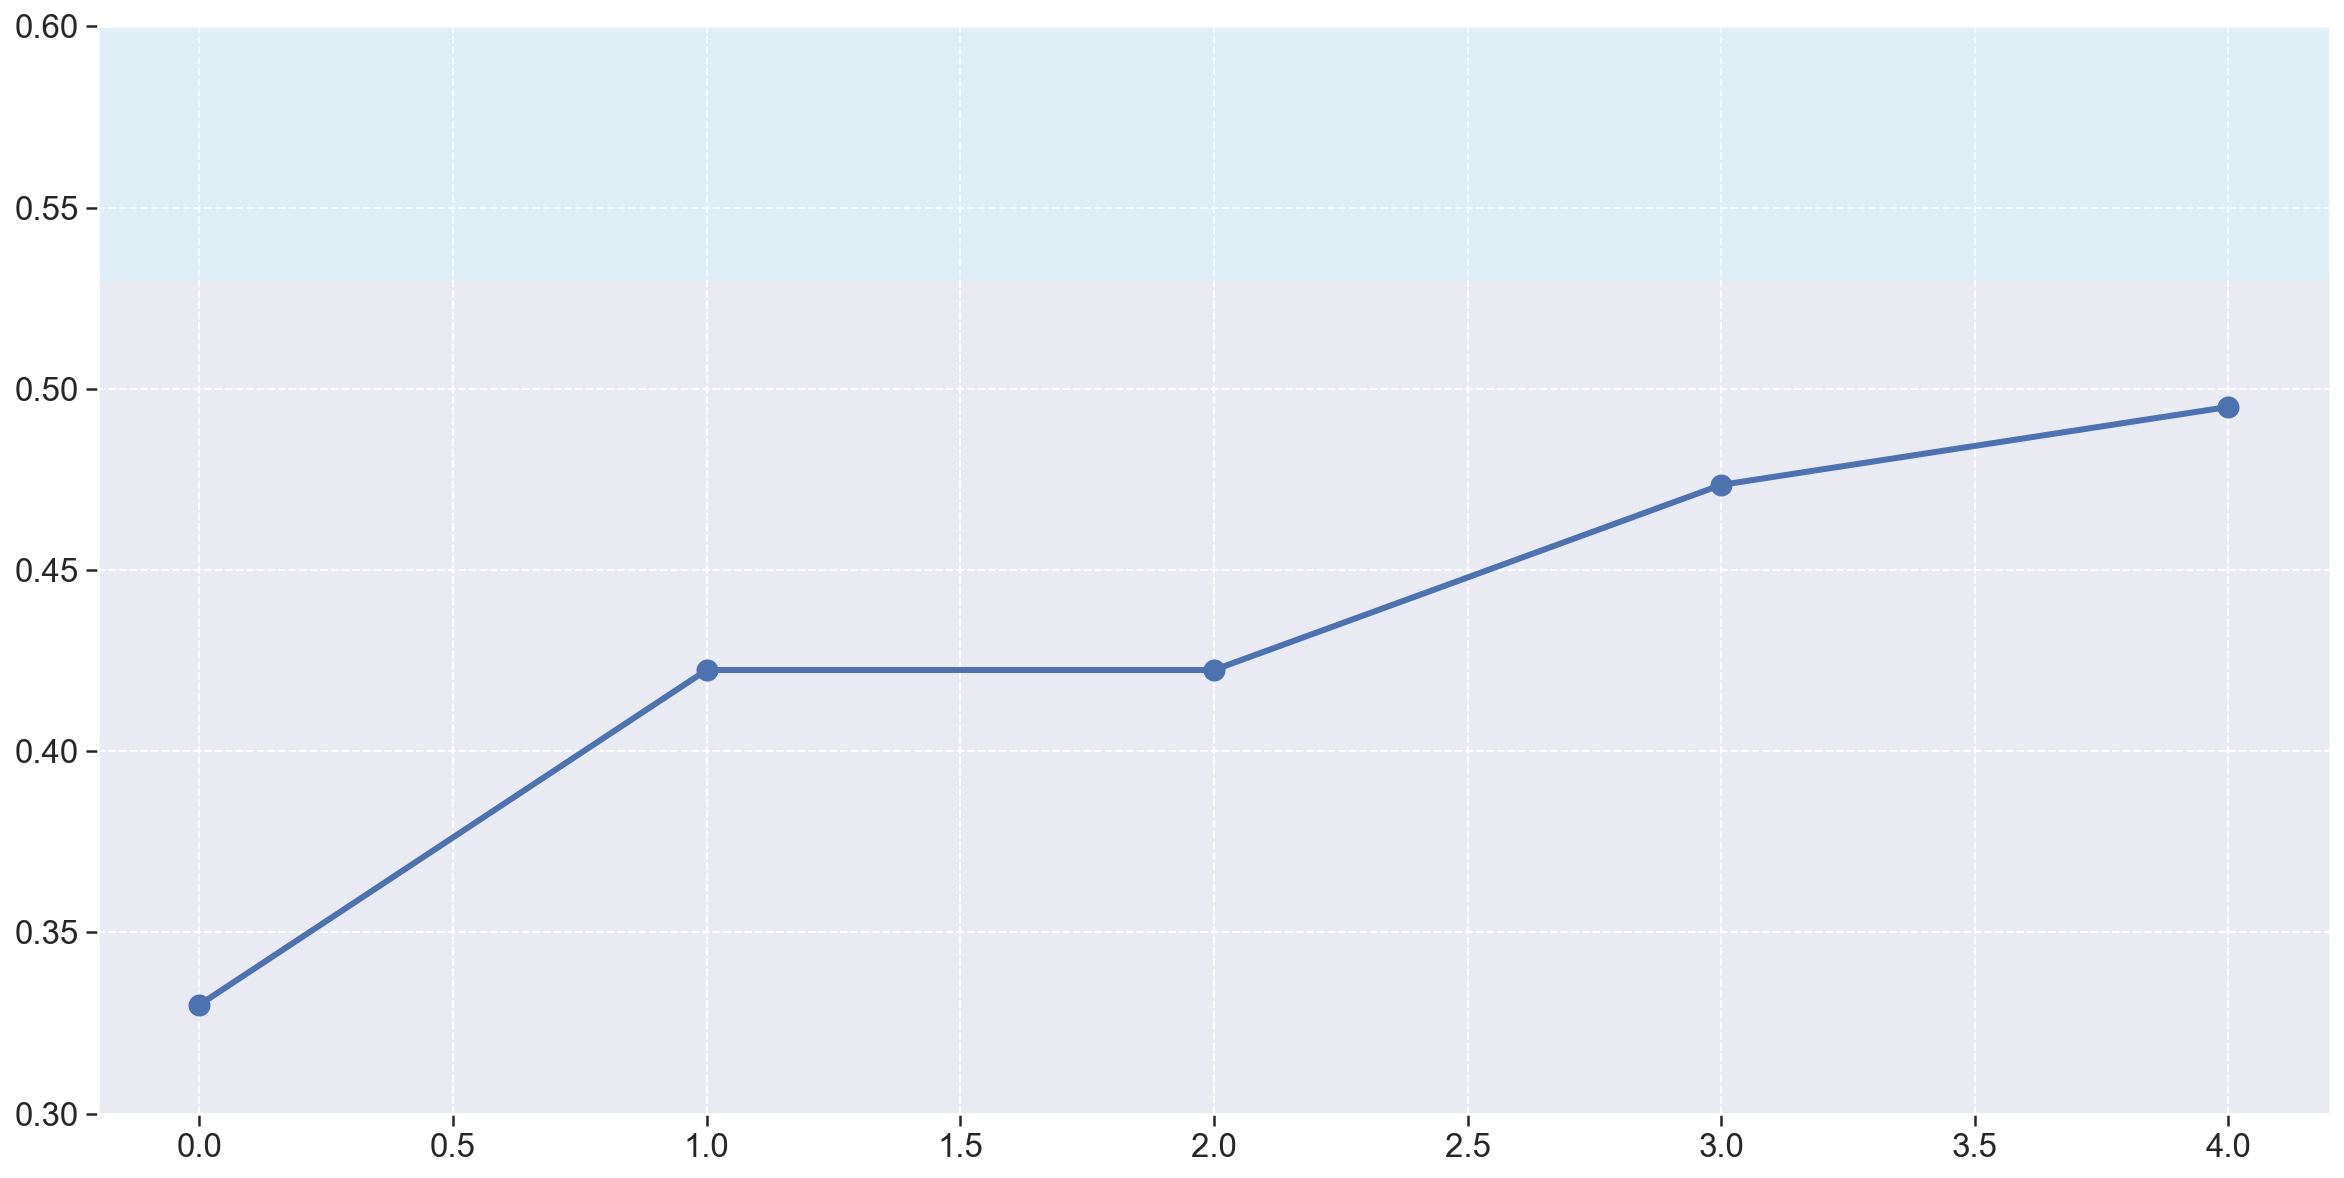

In [271]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["2020_2-Projeto-Kokama-Usuario"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.53,.6, color="#c9f9ff", alpha=0.3)

plt.ylim(.3,.6)

(0.3, 0.56)

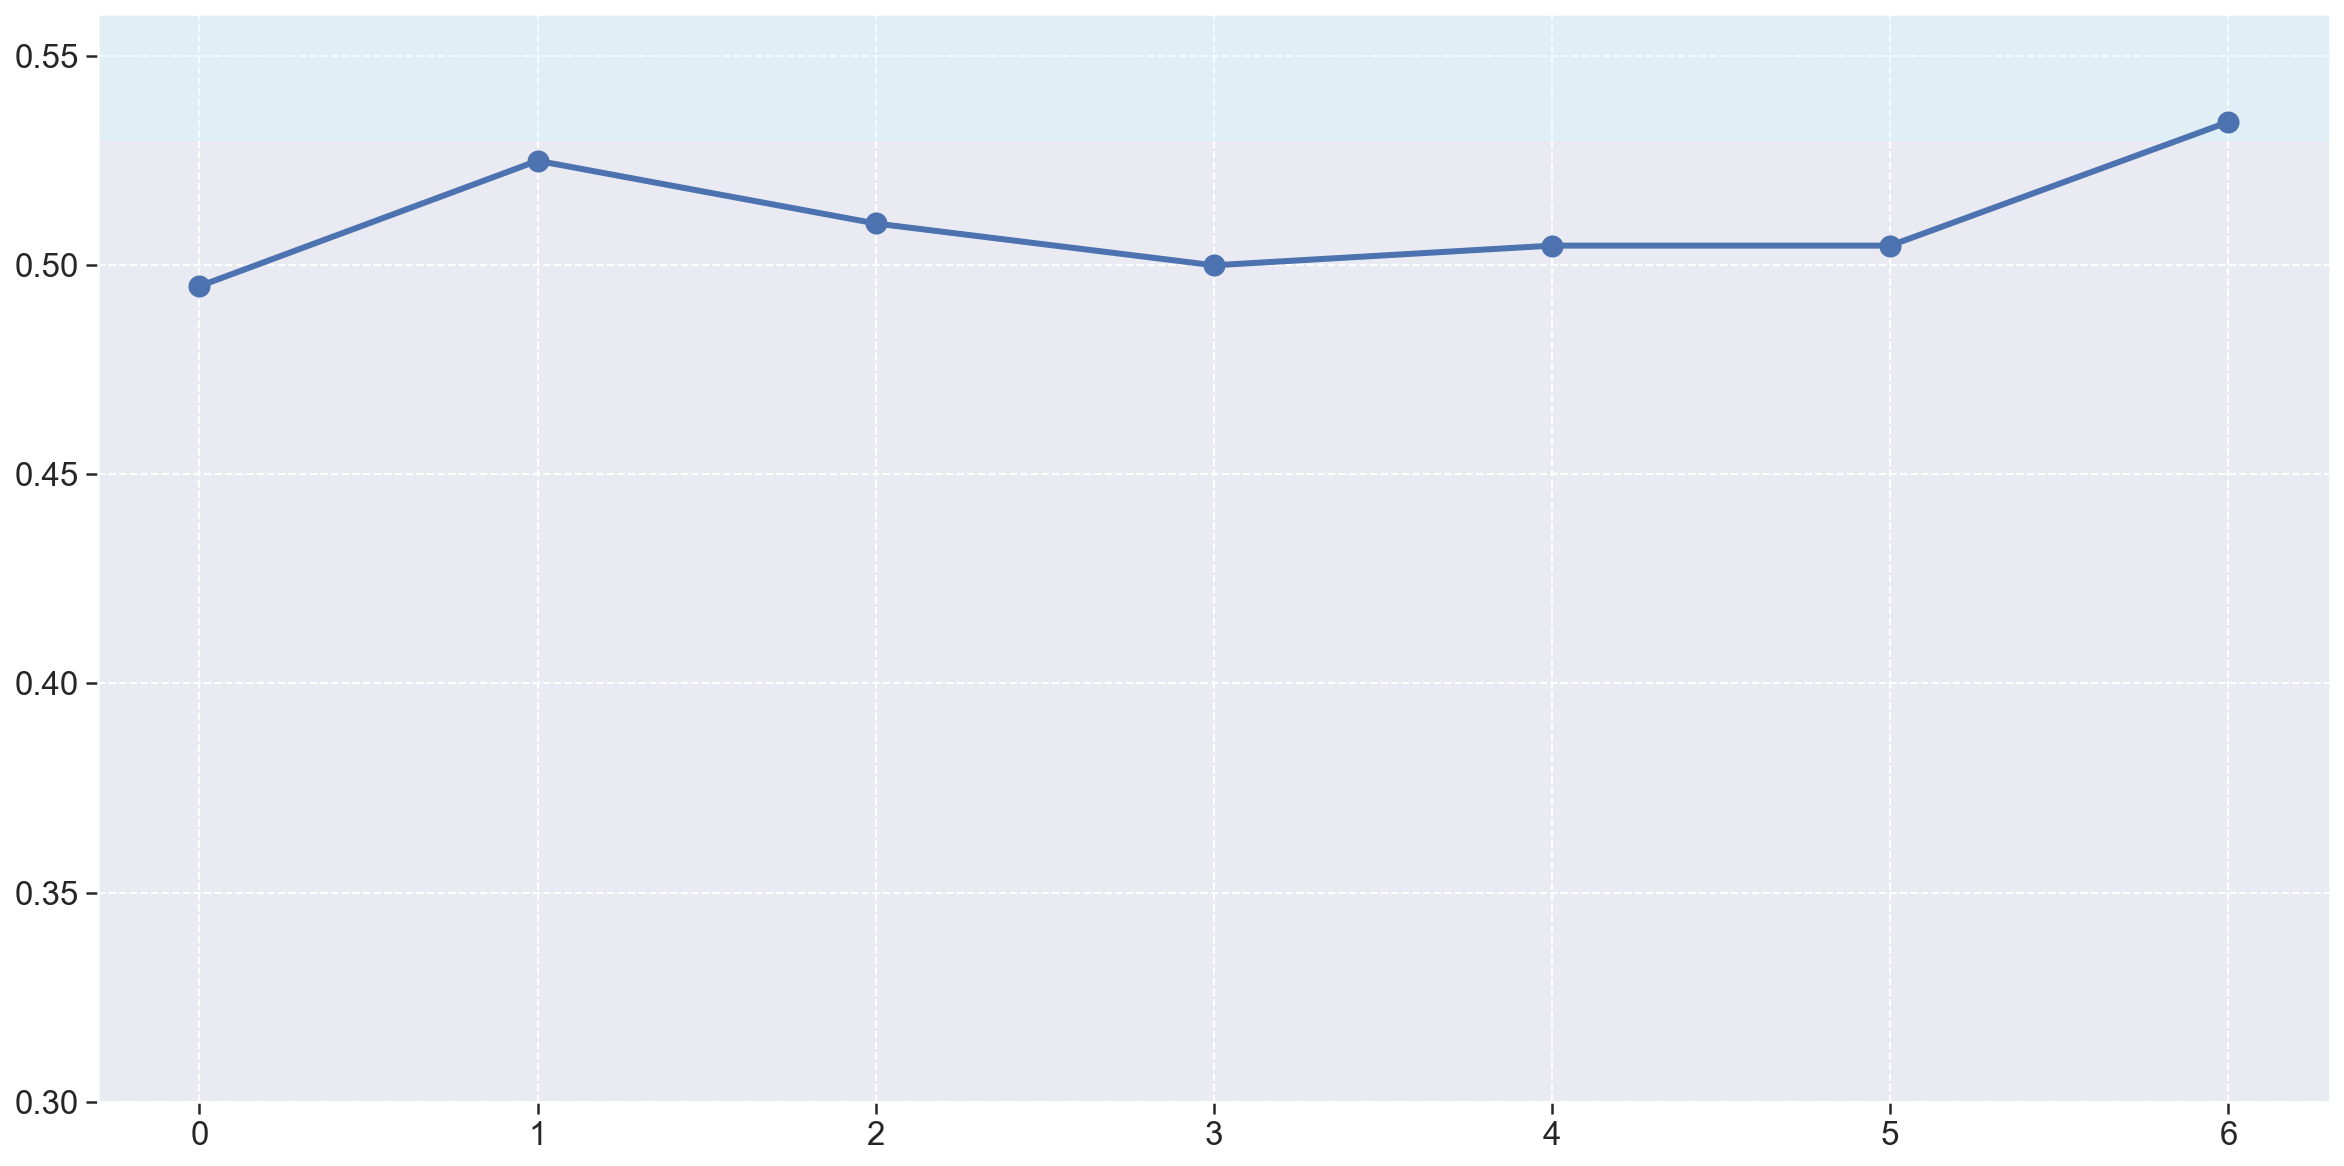

In [270]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["2020_2-Projeto-Kokama-Front-end"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.53,.56, color="#c9f9ff", alpha=0.3)

plt.ylim(.3,.56)

(0.3, 0.57)

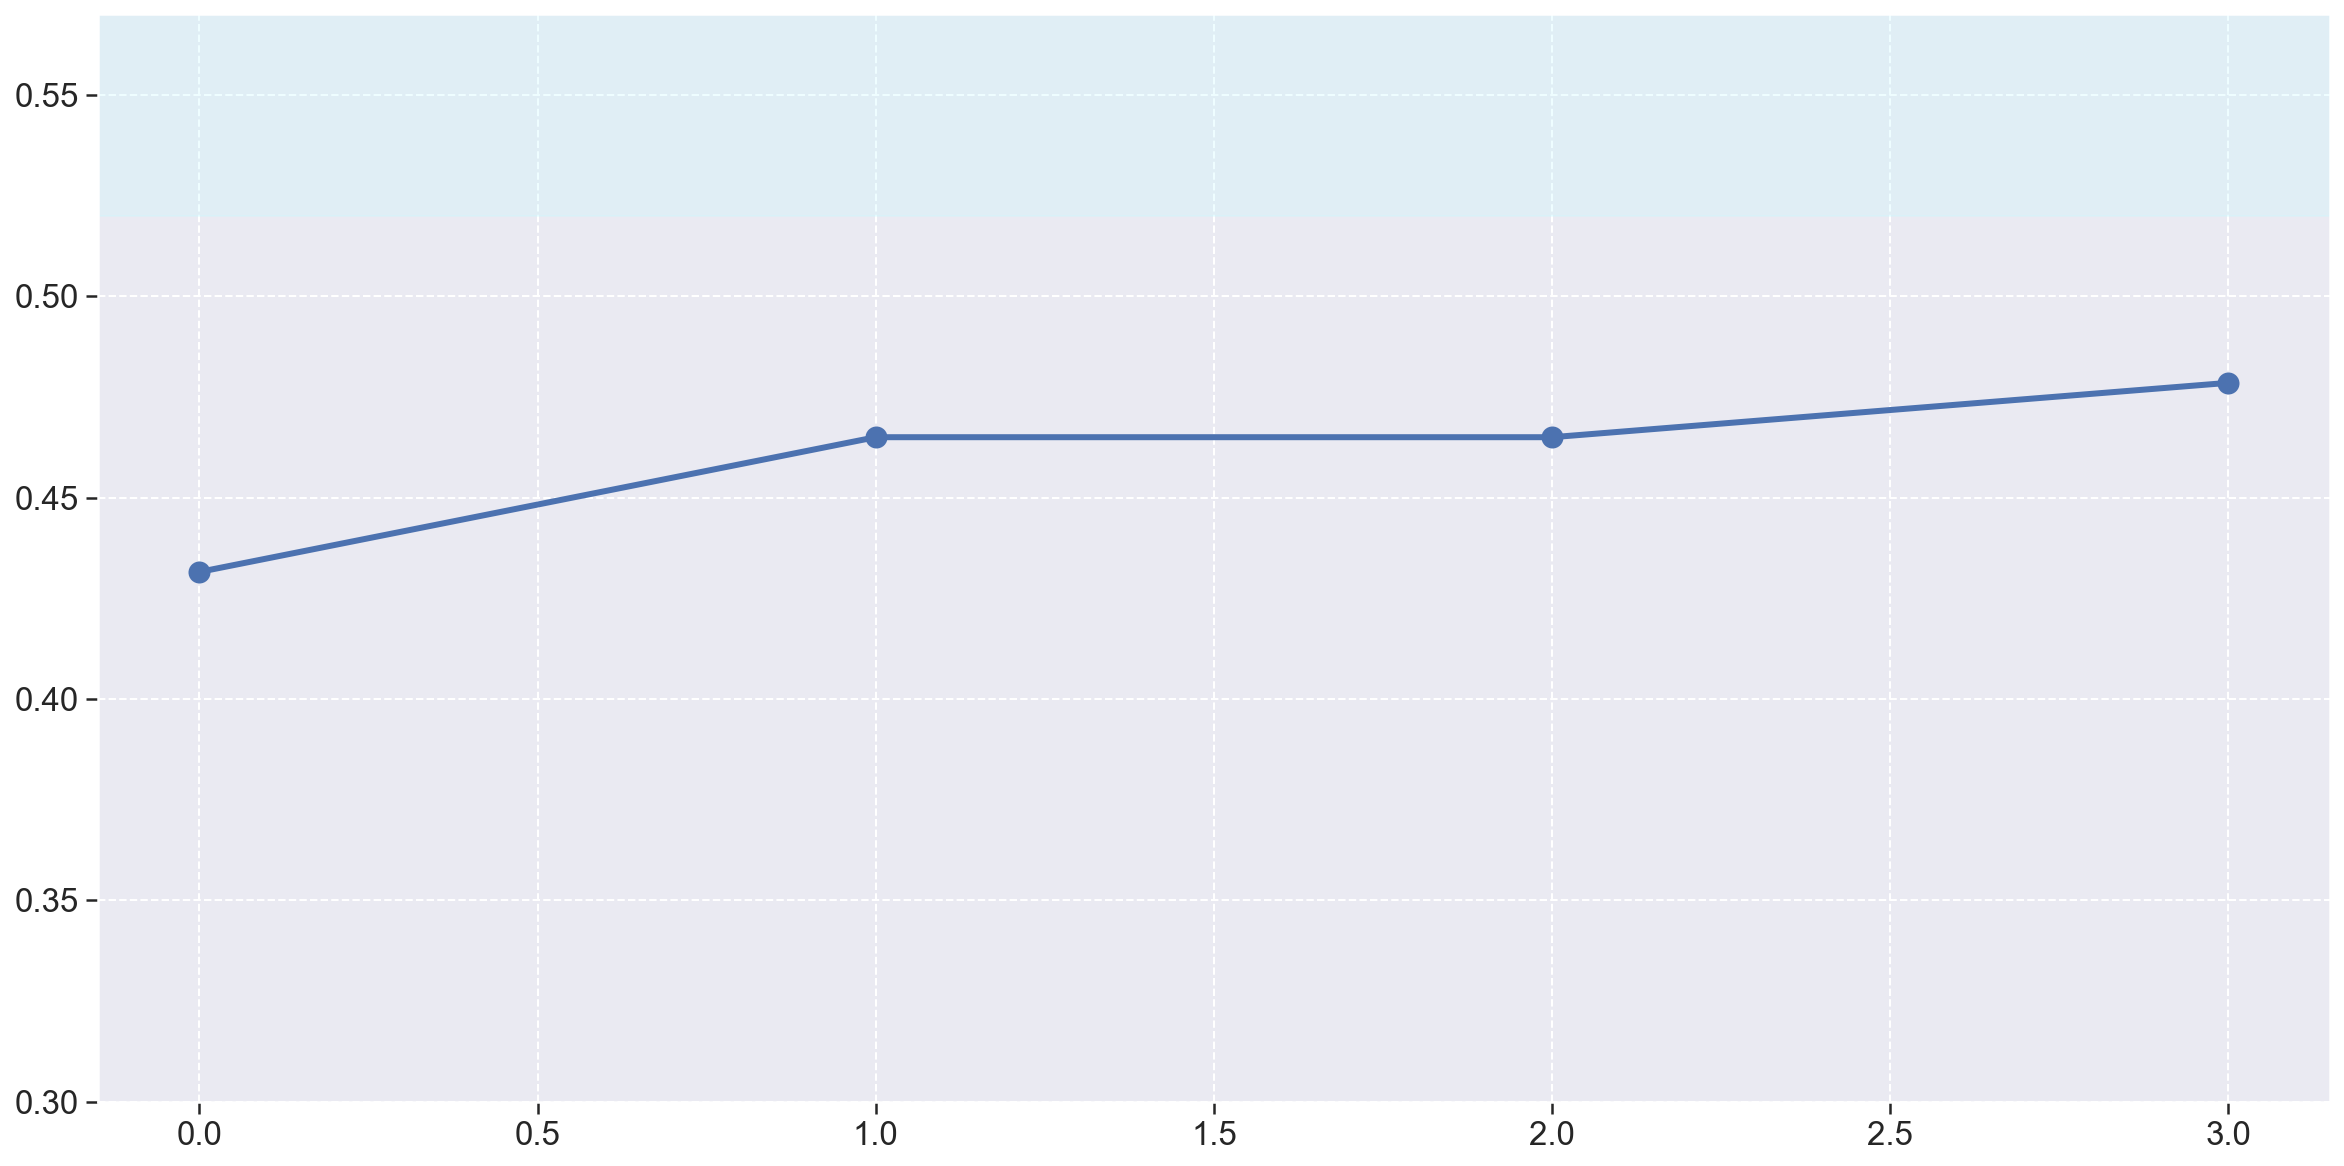

In [269]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["2020_2-Projeto-Kokama-Ensino"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.52,.57, color="#c9f9ff", alpha=0.3)

plt.ylim(.3,.57)

(0.3, 0.58)

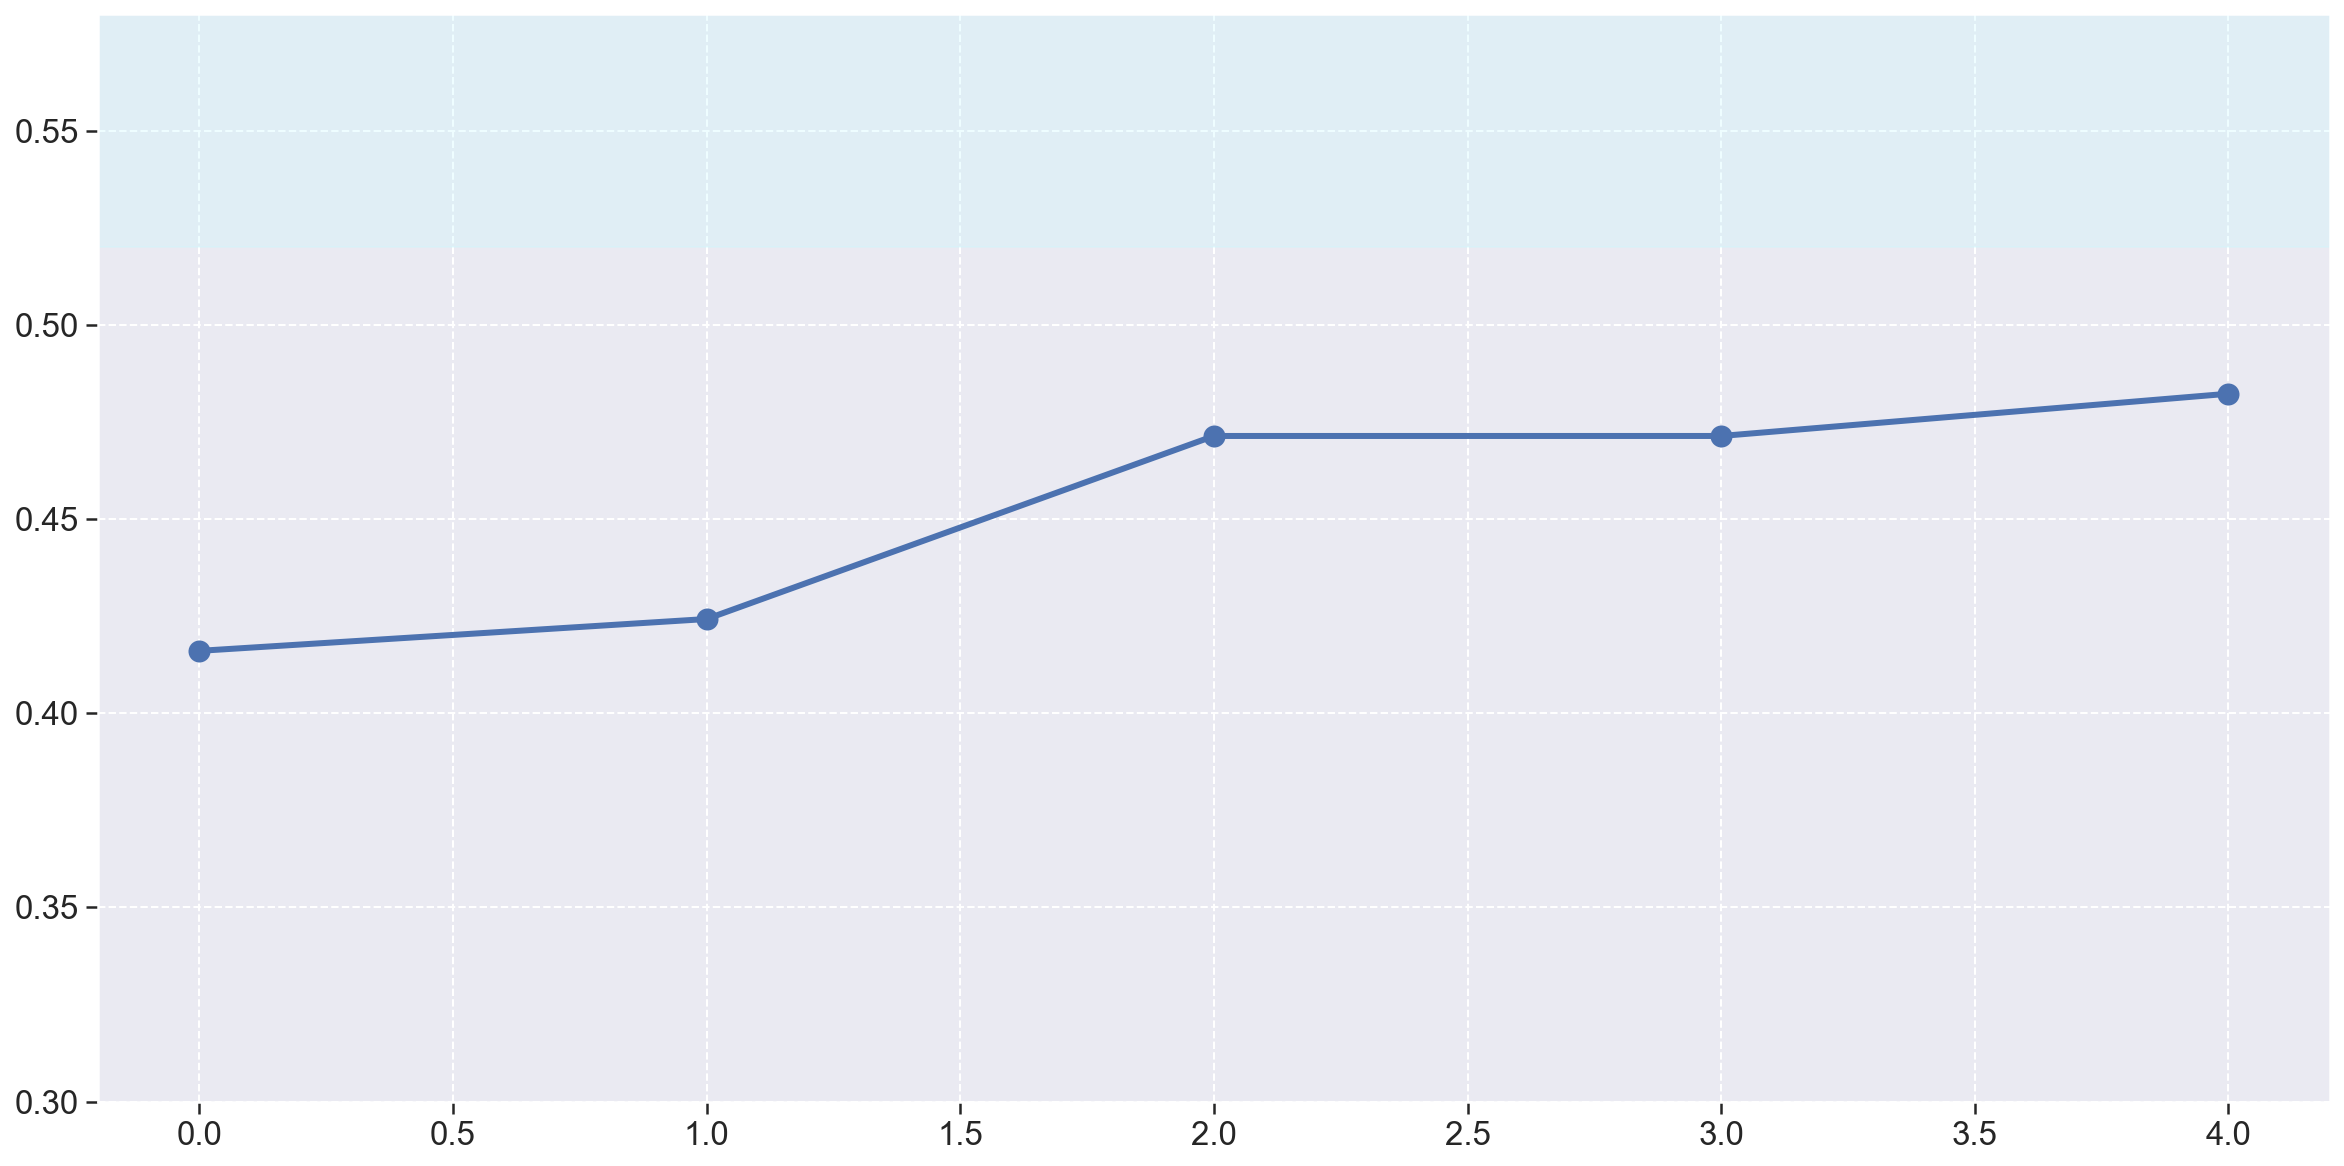

In [268]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["2020_2-Projeto-Kokama-Traducao"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.52,.58, color="#c9f9ff", alpha=0.3)

plt.ylim(.3,.58)

(0.3, 0.6)

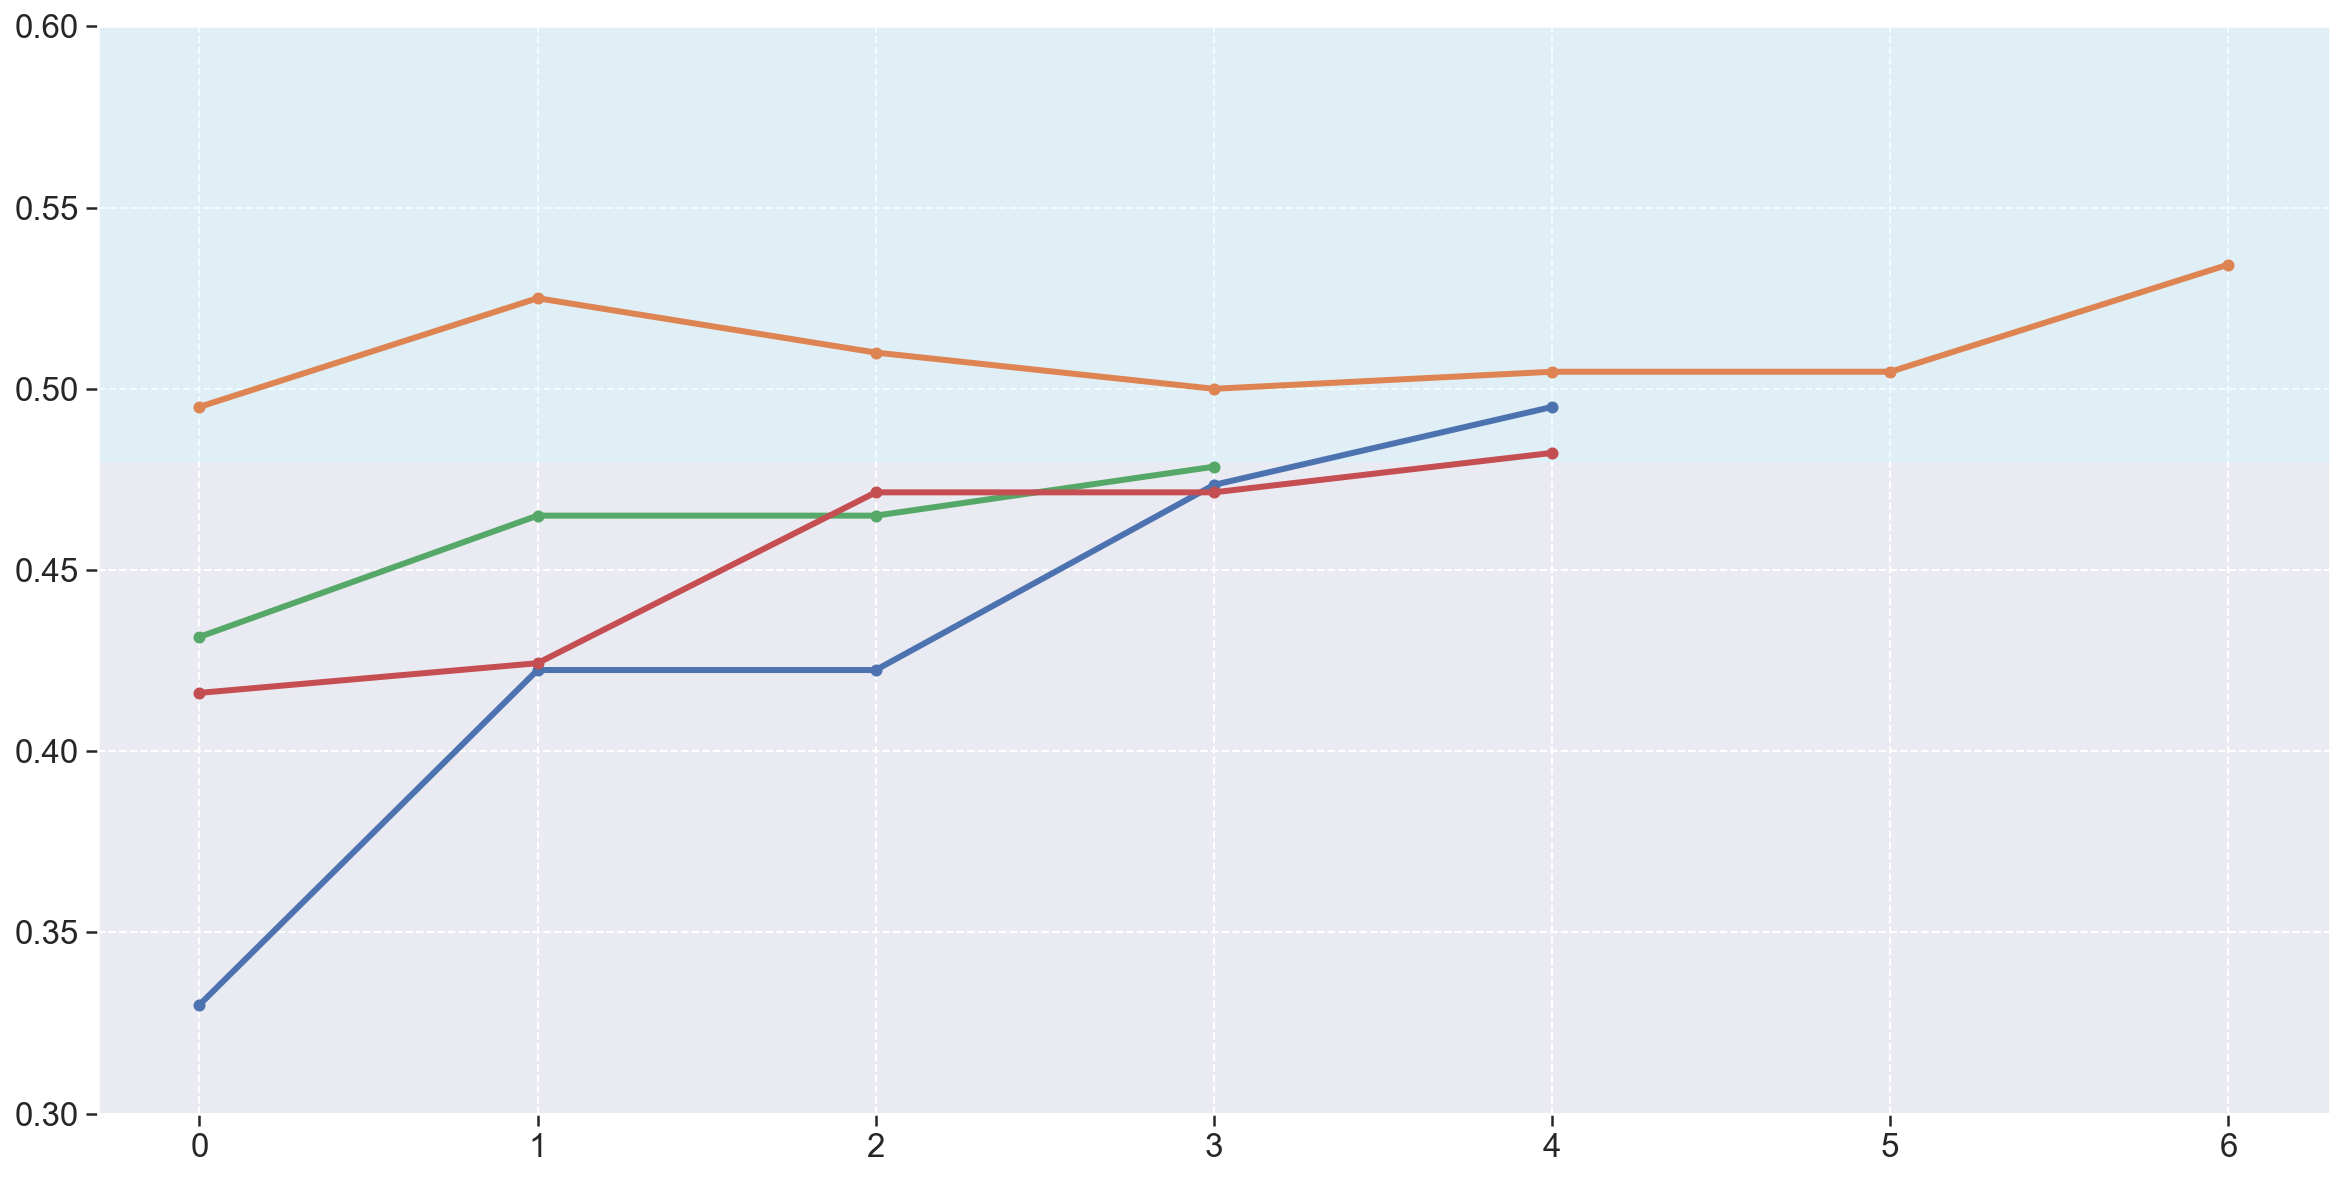

In [267]:
fig = plt.figure(figsize=(20, 10))


plt.plot(repository_metrics["2020_2-Projeto-Kokama-Usuario"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Front-end"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Ensino"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Traducao"]['asc1'], linewidth=3, marker='o', markersize=5)


# Background color
plt.axhspan(.48,.6, color="#c9f9ff", alpha=0.3)

plt.ylim(.3,.6)

In [263]:
metrics_df = pd.concat([repository_metrics["2020_2-Projeto-Kokama-Usuario"],
                        repository_metrics["2020_2-Projeto-Kokama-Front-end"],
                        repository_metrics["2020_2-Projeto-Kokama-Ensino"],
                        repository_metrics["2020_2-Projeto-Kokama-Traducao"]], ignore_index=True)

In [264]:
metrics_df['ac1'] = metrics_df['asc1'] * 1
metrics_df['total'] = metrics_df['asc1'] * 1

In [273]:
metrics_df




,m1,m2,m3,repository,version,asc1,ac1,total
0,0.000000,0.000000,1.0,2020_2-Projeto-Kokama-Usuario,2021-04-17,0.330000,0.330000,0.330000
1,0.200000,0.080000,1.0,2020_2-Projeto-Kokama-Usuario,2021-05-14,0.422400,0.422400,0.422400
2,0.200000,0.080000,1.0,2020_2-Projeto-Kokama-Usuario,2021-05-15,0.422400,0.422400,0.422400
3,0.304348,0.130435,1.0,2020_2-Projeto-Kokama-Usuario,2021-05-16,0.473478,0.473478,0.473478
4,0.333333,0.166667,1.0,2020_2-Projeto-Kokama-Usuario,2021-05-24,0.495000,0.495000,0.495000
5,0.500000,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-03-23,0.495000,0.495000,0.495000
6,0.545455,0.045455,1.0,2020_2-Projeto-Kokama-Front-end,2021-04-05,0.525000,0.525000,0.525000
7,0.515152,0.030303,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-11,0.510000,0.510000,0.510000
8,0.515152,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-15,0.500000,0.500000,0.500000
9,0.529412,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-17,0.504706,0.504706,0.504706


In [ ]:
metrics_df.to_excel('data/fga-eps-mds-2020-2-data/kokama/qrapids-kokama-dataset-23-03-2021-24-05-2021-xlsx.xlsx', index = False)
metrics_df.to_csv('data/fga-eps-mds-2020-2-data/kokama/qrapids-kokama-dataset-23-03-2021-24-05-2021-csv.csv', header=False, index = False)